# EDA
## 1. 사기와 아닌 데이터 구분

In [1]:
df = pd.read_csv('../../datas/fraud_detect_data_encoded.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c_1     16000 non-null  int64  
 1   c_2     16000 non-null  int64  
 2   c_3     16000 non-null  int64  
 3   c_4     16000 non-null  int64  
 4   c_5     16000 non-null  int64  
 5   c_6     16000 non-null  int64  
 6   c_7     16000 non-null  int64  
 7   c_8     16000 non-null  int64  
 8   c_9     16000 non-null  int64  
 9   c_10    16000 non-null  int64  
 10  c_11    16000 non-null  int64  
 11  c_12    16000 non-null  int64  
 12  c_13    16000 non-null  int64  
 13  c_14    16000 non-null  int64  
 14  c_15    16000 non-null  float64
 15  c_16    16000 non-null  int64  
 16  c_17    16000 non-null  int64  
 17  c_18    16000 non-null  int64  
 18  c_19    16000 non-null  int64  
 19  c_20    16000 non-null  int64  
 20  c_21    16000 non-null  int64  
 21  c_22    16000 non-null  int64  
 22

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [11]:
pd.options.display.max_columns = None

In [3]:
from matplotlib import font_manager, rc

f_path = '/Library/Fonts/Arial Unicode.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

In [4]:
df_fr_t = df[df.c_1 == 1]
df_fr_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 6 to 11179
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c_1     41 non-null     int64  
 1   c_2     41 non-null     int64  
 2   c_3     41 non-null     int64  
 3   c_4     41 non-null     int64  
 4   c_5     41 non-null     int64  
 5   c_6     41 non-null     int64  
 6   c_7     41 non-null     int64  
 7   c_8     41 non-null     int64  
 8   c_9     41 non-null     int64  
 9   c_10    41 non-null     int64  
 10  c_11    41 non-null     int64  
 11  c_12    41 non-null     int64  
 12  c_13    41 non-null     int64  
 13  c_14    41 non-null     int64  
 14  c_15    41 non-null     float64
 15  c_16    41 non-null     int64  
 16  c_17    41 non-null     int64  
 17  c_18    41 non-null     int64  
 18  c_19    41 non-null     int64  
 19  c_20    41 non-null     int64  
 20  c_21    41 non-null     int64  
 21  c_22    41 non-null     int64  
 22  c

In [5]:
df_fr_f = df[df.c_1 == 0]
df_fr_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15959 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c_1     15959 non-null  int64  
 1   c_2     15959 non-null  int64  
 2   c_3     15959 non-null  int64  
 3   c_4     15959 non-null  int64  
 4   c_5     15959 non-null  int64  
 5   c_6     15959 non-null  int64  
 6   c_7     15959 non-null  int64  
 7   c_8     15959 non-null  int64  
 8   c_9     15959 non-null  int64  
 9   c_10    15959 non-null  int64  
 10  c_11    15959 non-null  int64  
 11  c_12    15959 non-null  int64  
 12  c_13    15959 non-null  int64  
 13  c_14    15959 non-null  int64  
 14  c_15    15959 non-null  float64
 15  c_16    15959 non-null  int64  
 16  c_17    15959 non-null  int64  
 17  c_18    15959 non-null  int64  
 18  c_19    15959 non-null  int64  
 19  c_20    15959 non-null  int64  
 20  c_21    15959 non-null  int64  
 21  c_22    15959 non-null  int64  
 22

In [6]:
df.c_1[df.c_20.isin([1,2,3])].sum()

41

## 2. Y/N data의 feature간 density 비교

/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


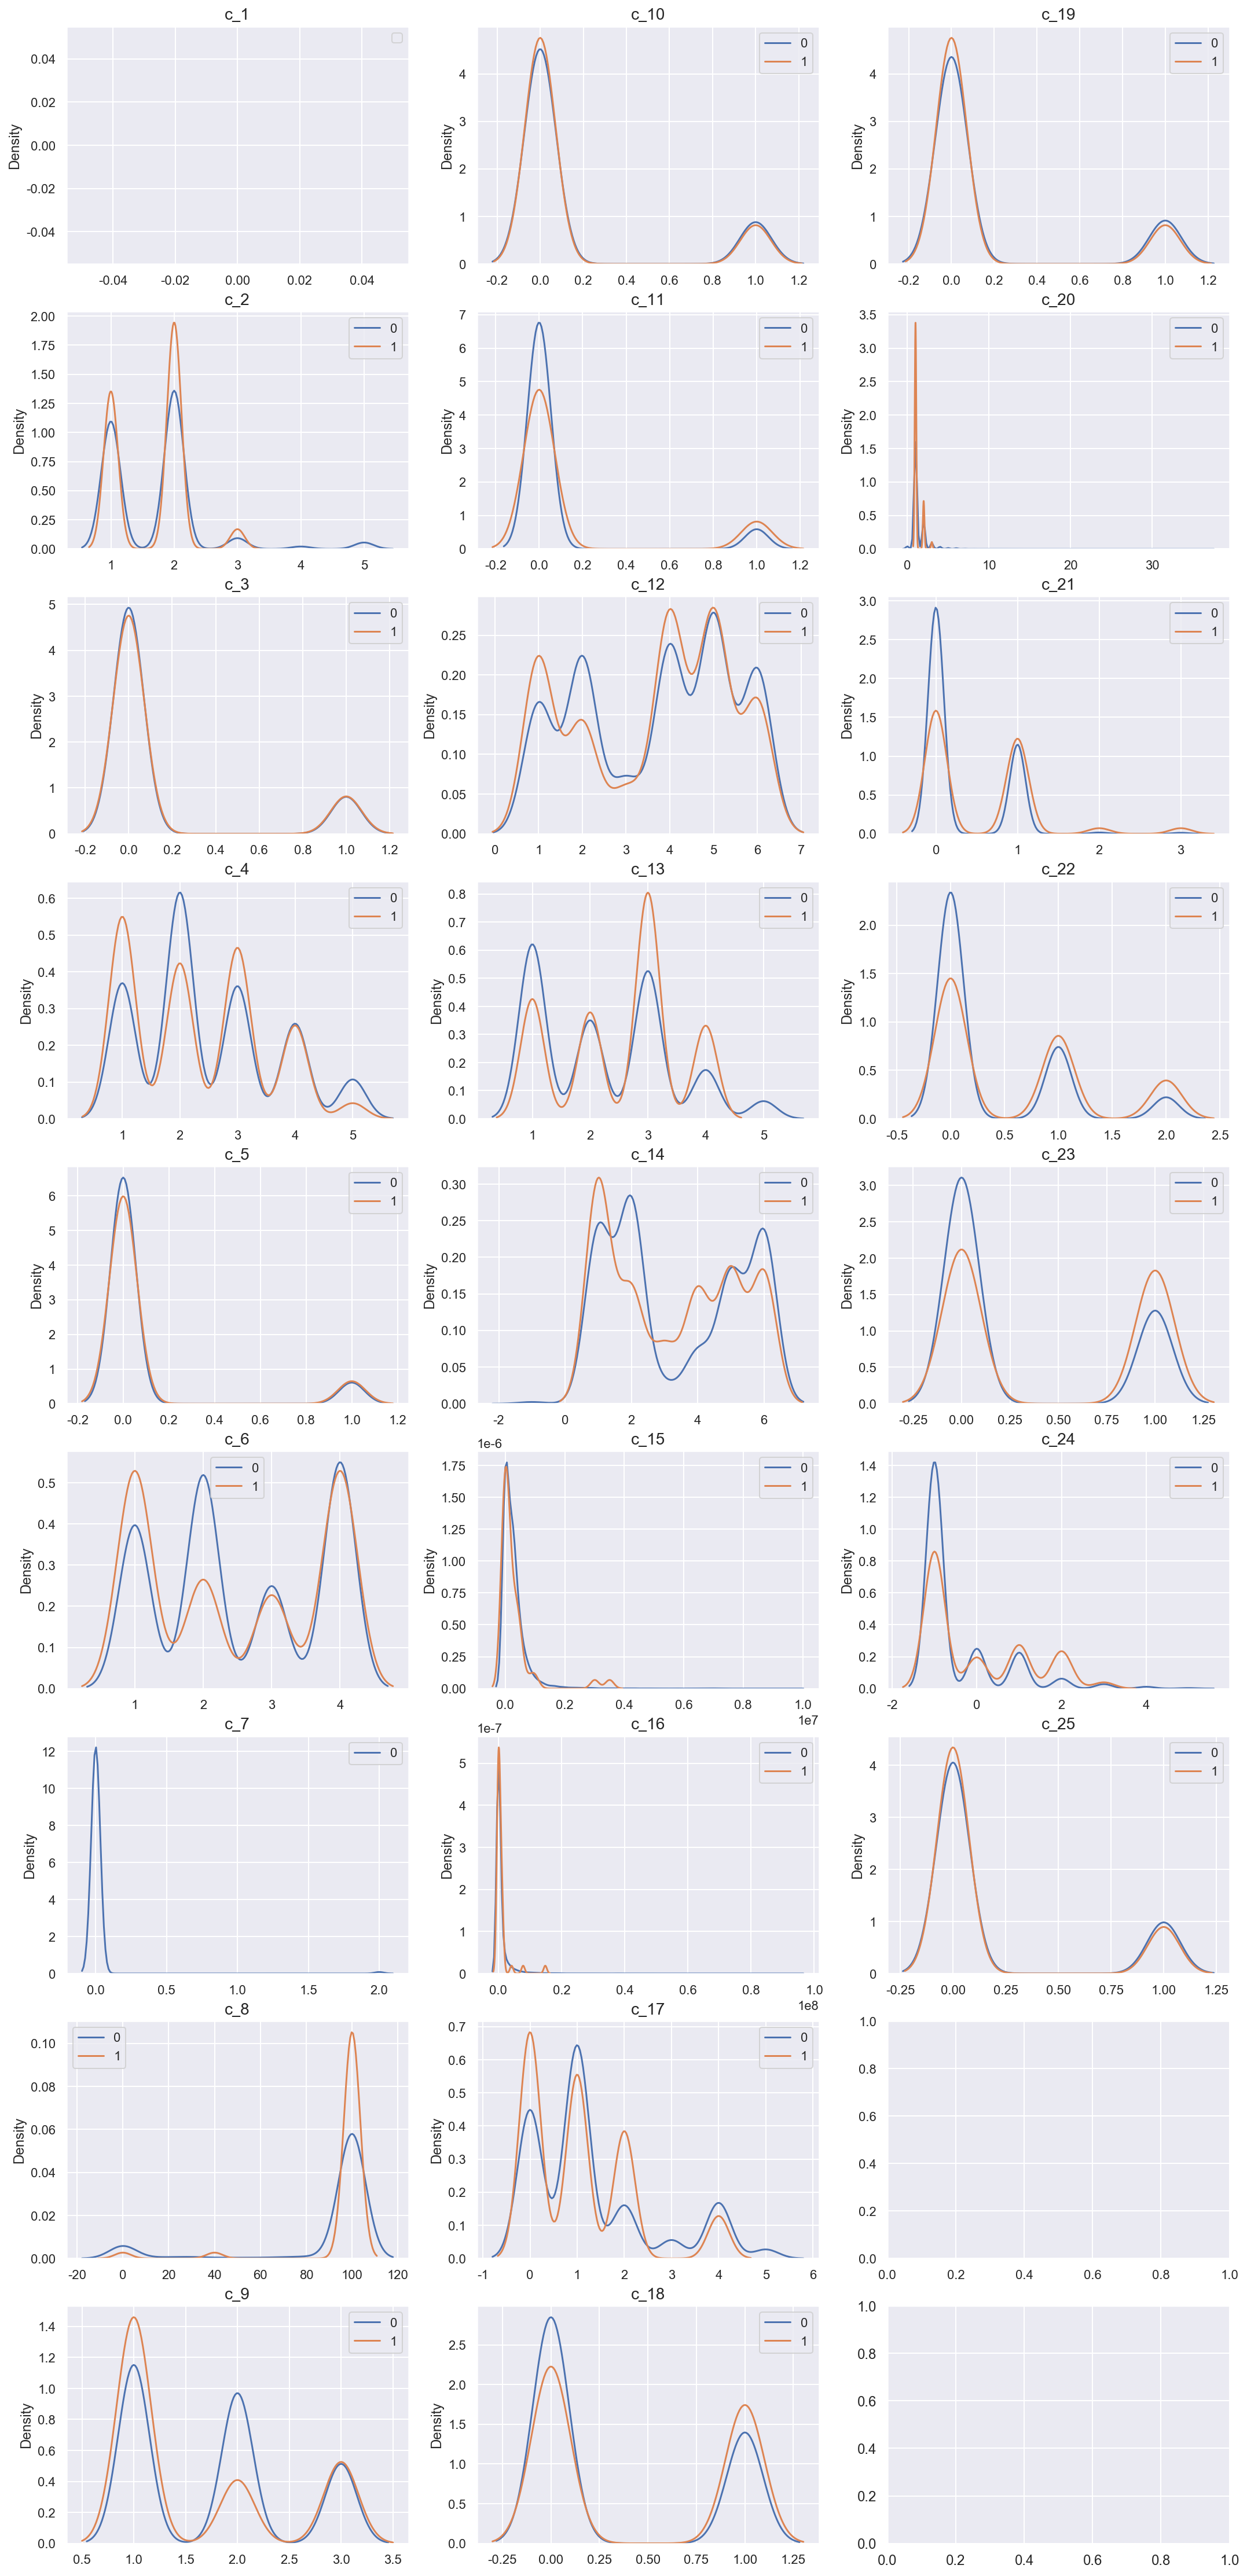

In [7]:
fig, axes = plt.subplots(9, 3, figsize=(18,40))
axes = axes.T.flatten()

for idx, feature in enumerate(df.columns.values):
    sns.kdeplot(df_fr_f[feature], bw_method=0.2, label='0', ax=axes[idx])
    sns.kdeplot(df_fr_t[feature], bw_method=0.2, label='1', ax=axes[idx])    
    
    axes[idx].set_title(feature, fontsize=14)
    axes[idx].set_xlabel('')
    axes[idx].legend()

    plt.tick_params(axis='both', which='major', labelsize=12)

눈에띄게 다른 feature
- c_4
- c_12
- c_21
- c_6
- c_13
- c_14
- c_24
- c_8
- c_17
- c_9

In [8]:
# 사기는 미신고 없다
df_fr_t['c_23'].unique()

array([1, 0])

## 3. c_1 == 1 데이터의 histogram

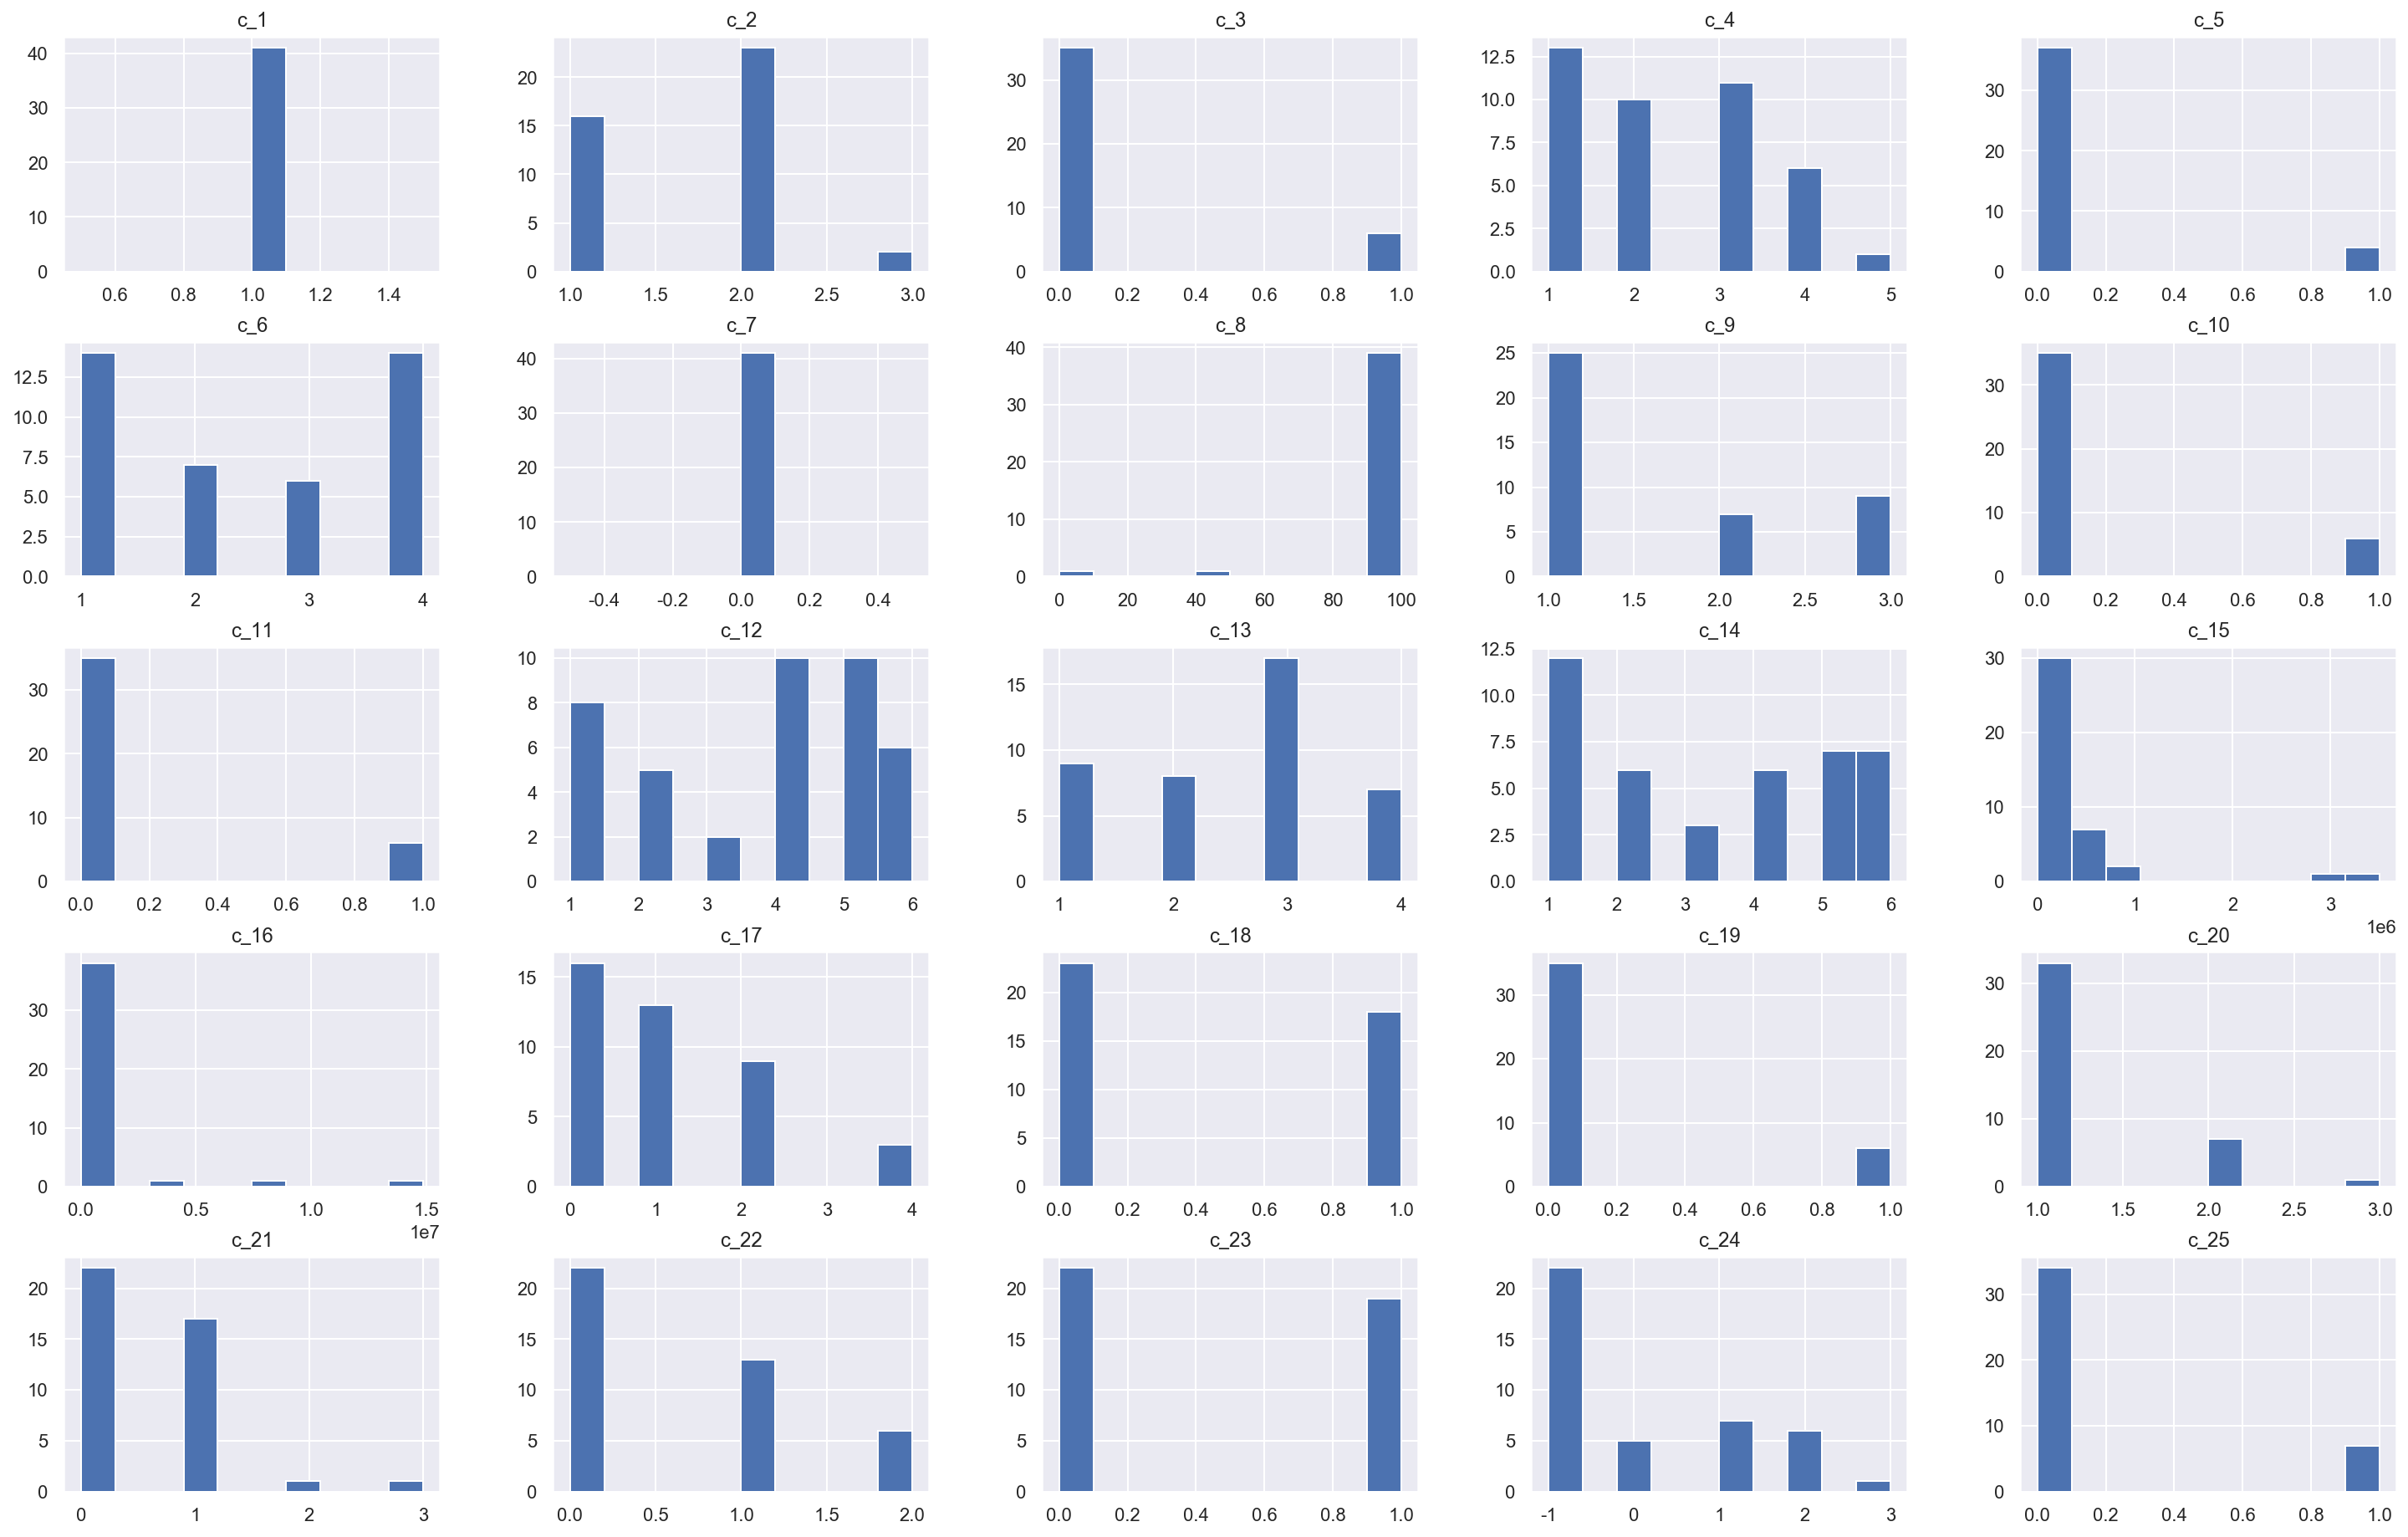

In [9]:
df_fr_t.hist(figsize=(25,16));

In [10]:
# 비율 파악

for cols in df_fr_t.columns:
    print(f"[{cols}]")
    for idx, value in df_fr_t[cols].value_counts().iteritems():
        percnt = round(value / 41 * 100, 1)
        print(f"'{idx}' : {value} ({percnt}%)", "/" , end=' ')
    print()    
    print('=========', sep='\n')

[c_1]
'1' : 41 (100.0%) / 
[c_2]
'2' : 23 (56.1%) / '1' : 16 (39.0%) / '3' : 2 (4.9%) / 
[c_3]
'0' : 35 (85.4%) / '1' : 6 (14.6%) / 
[c_4]
'1' : 13 (31.7%) / '3' : 11 (26.8%) / '2' : 10 (24.4%) / '4' : 6 (14.6%) / '5' : 1 (2.4%) / 
[c_5]
'0' : 37 (90.2%) / '1' : 4 (9.8%) / 
[c_6]
'4' : 14 (34.1%) / '1' : 14 (34.1%) / '2' : 7 (17.1%) / '3' : 6 (14.6%) / 
[c_7]
'0' : 41 (100.0%) / 
[c_8]
'100' : 39 (95.1%) / '40' : 1 (2.4%) / '0' : 1 (2.4%) / 
[c_9]
'1' : 25 (61.0%) / '3' : 9 (22.0%) / '2' : 7 (17.1%) / 
[c_10]
'0' : 35 (85.4%) / '1' : 6 (14.6%) / 
[c_11]
'0' : 35 (85.4%) / '1' : 6 (14.6%) / 
[c_12]
'5' : 10 (24.4%) / '4' : 10 (24.4%) / '1' : 8 (19.5%) / '6' : 6 (14.6%) / '2' : 5 (12.2%) / '3' : 2 (4.9%) / 
[c_13]
'3' : 17 (41.5%) / '1' : 9 (22.0%) / '2' : 8 (19.5%) / '4' : 7 (17.1%) / 
[c_14]
'1' : 12 (29.3%) / '6' : 7 (17.1%) / '5' : 7 (17.1%) / '4' : 6 (14.6%) / '2' : 6 (14.6%) / '3' : 3 (7.3%) / 
[c_15]
'0.0' : 23 (56.1%) / '183486.5085' : 2 (4.9%) / '387896.8028' : 1 (2.4%) / '32358

## 4. 사기 유저의 특이한 대여 패턴이 있을까?
일반적인 유저와 사기 유저는 대여 패턴이 다를거라 생각
### 4-1. c_12과 c_13

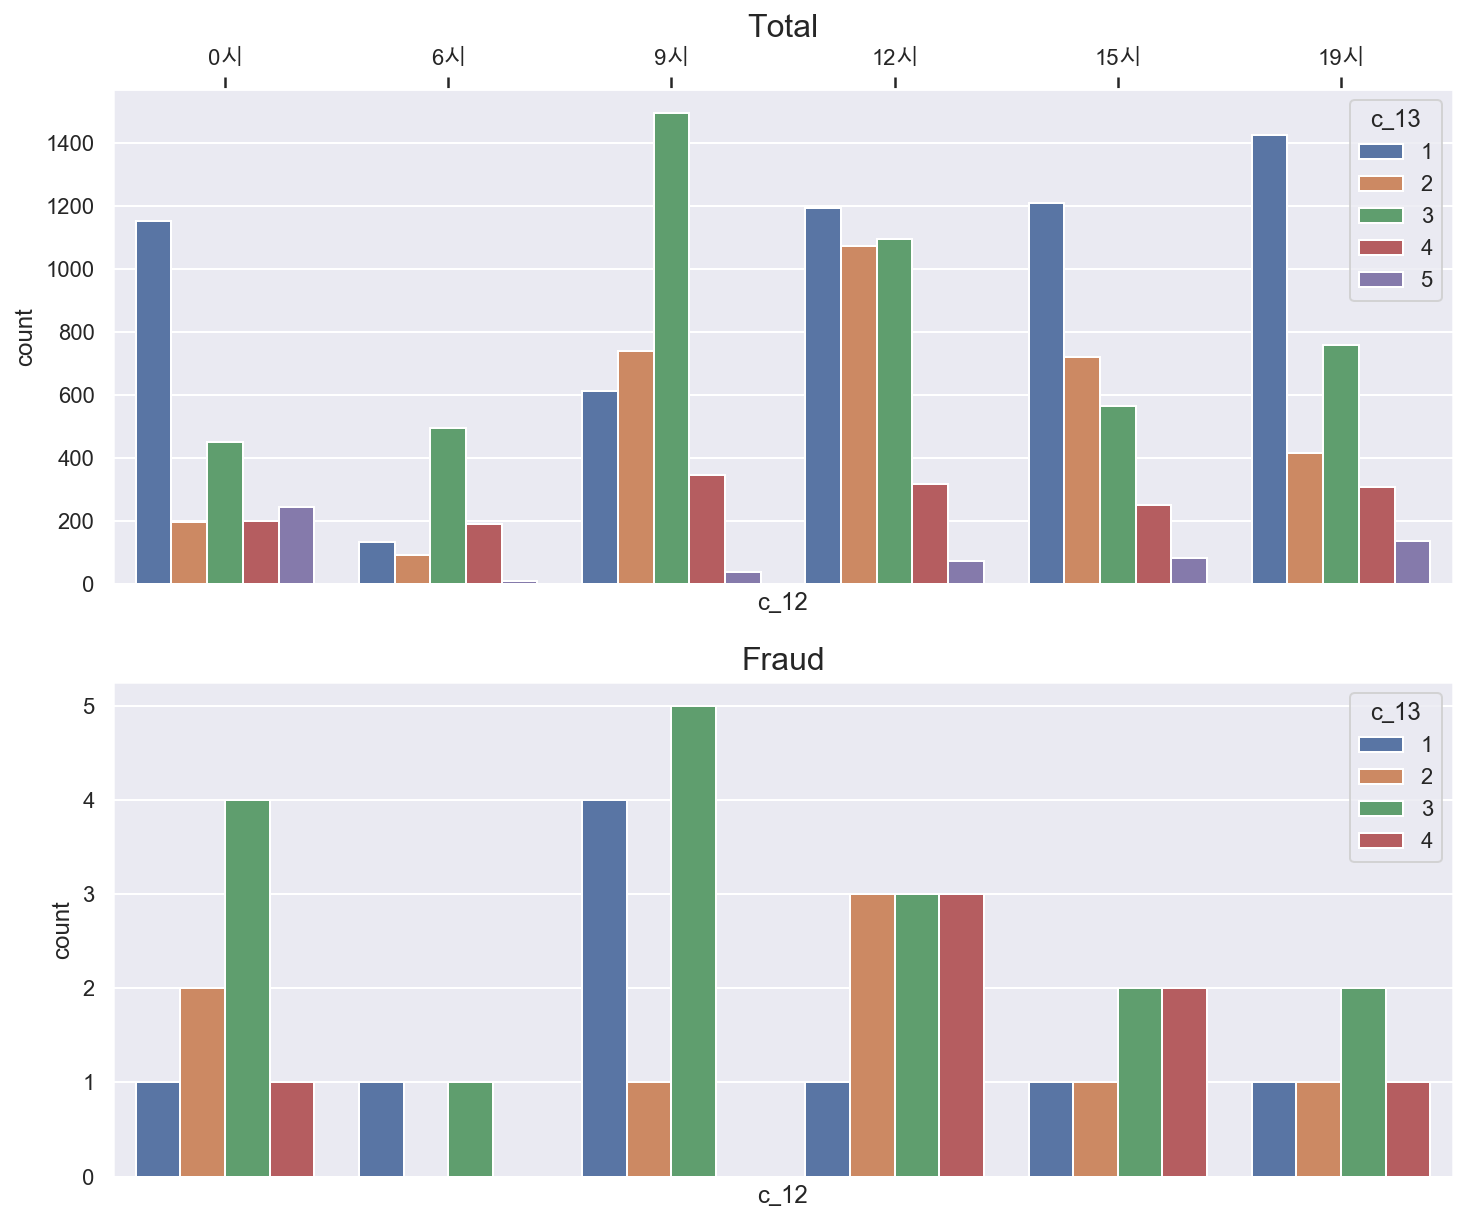

<Figure size 864x576 with 0 Axes>

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
plt.figure(figsize=(12,8))
sns.countplot(x='c_12',hue='c_13' ,data=df, ax=ax[0], order=[1,3,4,5,6,2])
ax[0].set_title('Total', fontsize=16)
ax[0].set_xticks([])
ax_t = ax[0].secondary_xaxis('top')
ax_t.set_xticks(ticks=np.arange(7))
ax_t.set_xticklabels(labels = ['0시','6시','9시','12시','15시','19시','22시'])

sns.countplot(x='c_12',hue='c_13' ,data=df_fr_t, ax=ax[1], order=[1,3,4,5,6,2]);
ax[1].set_title('Fraud', fontsize=16)
ax[1].set_xticks([]);

# 일반적인 유저는 1.아침을 제외하곤 짧게 빌리고 2.아침에는 10시간이상 빌리는 비율이 높다(여행이라 추측)
# 사기 유저는 반면에 1. 밤에 길게 빌리거나 2. 아침에 짧게 빌리는 비율이 높다

# => 아침을 제외하고 전체적으로 길게 빌리는 비율이 높다. => 전략적 선택인가
# => 한계 : 데이터의 수가 적어서 한 두 건 차이로 경향을 단정짓긴 어려움

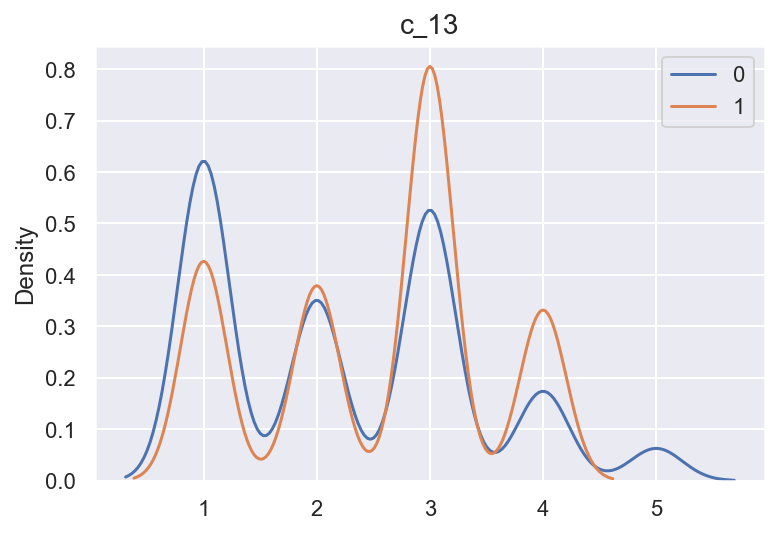

In [13]:
sns.kdeplot(df_fr_f['c_13'], bw_method=0.2, label='0')
sns.kdeplot(df_fr_t['c_13'], bw_method=0.2, label='1')    

plt.title('c_13', fontsize=14)
plt.xlabel('')
plt.legend();

# false경우의 c13 분포가 상대적으로 길다

### 이용시작시간, 대여기간, 차량 종류

In [18]:
df_tmp = df_fr_f.pivot_table(index=['c_12','c_13'], columns='c_2', values='c_1', aggfunc=np.ma.count)
df_tmp = round(df_tmp * 100 / len(df), 2)
df_tmp = df_tmp.fillna(0)
df_tmp = df_tmp.drop(5, level=1)
df_tmp = df_tmp.drop([4,5], axis=1)
df_tmp = df_tmp.rename(index={1:"00시", 2:"19시", 3: "06시", 4: "09시", 5: "12시", 6: "15시"}, level=0).sort_index()
df_tmp

c_2           1     2     3
c_12 c_13                  
00시  1    2.980 3.890 0.140
     2    0.490 0.620 0.070
     3    1.110 1.420 0.160
     4    0.400 0.660 0.090
06시  1    0.410 0.360 0.010
     2    0.260 0.280 0.010
     3    1.110 1.600 0.270
     4    0.480 0.490 0.110
09시  1    1.590 2.060 0.110
     2    2.130 2.150 0.180
     3    3.940 4.660 0.440
     4    0.830 1.090 0.120
12시  1    3.240 3.920 0.160
     2    2.970 3.450 0.150
     3    2.860 3.520 0.240
     4    0.700 1.020 0.110
15시  1    3.300 3.970 0.160
     2    1.940 2.320 0.110
     3    1.340 1.820 0.170
     4    0.590 0.850 0.070
19시  1    3.640 4.960 0.140
     2    1.180 1.260 0.060
     3    1.890 2.460 0.220
     4    0.710 1.030 0.090

In [19]:
df_tmp2 = df_fr_t.pivot_table(index=['c_12','c_13'], columns='c_2', values='c_1', aggfunc=np.ma.count)
df_tmp2 = round(df_tmp2 * 100 / len(df_fr_t), 2)
df_tmp2 = df_tmp2.fillna(0)
df_tmp2 = df_tmp2.rename(index={1:"00시", 2:"19시", 3: "06시", 4: "09시", 5: "12시", 6: "15시"}, level=0).sort_index()
df_tmp2

c_2           1     2     3
c_12 c_13                  
00시  1    2.440 0.000 0.000
     2    4.880 0.000 0.000
     3    7.320 2.440 0.000
     4    2.440 0.000 0.000
06시  1    0.000 2.440 0.000
     3    2.440 0.000 0.000
09시  1    0.000 9.760 0.000
     2    0.000 2.440 0.000
     3    2.440 9.760 0.000
12시  1    2.440 0.000 0.000
     2    0.000 7.320 0.000
     3    4.880 2.440 0.000
     4    2.440 4.880 0.000
15시  1    2.440 0.000 0.000
     2    0.000 2.440 0.000
     3    2.440 0.000 2.440
     4    0.000 2.440 2.440
19시  1    0.000 2.440 0.000
     2    0.000 2.440 0.000
     3    0.000 4.880 0.000
     4    2.440 0.000 0.000

<Figure size 432x288 with 0 Axes>

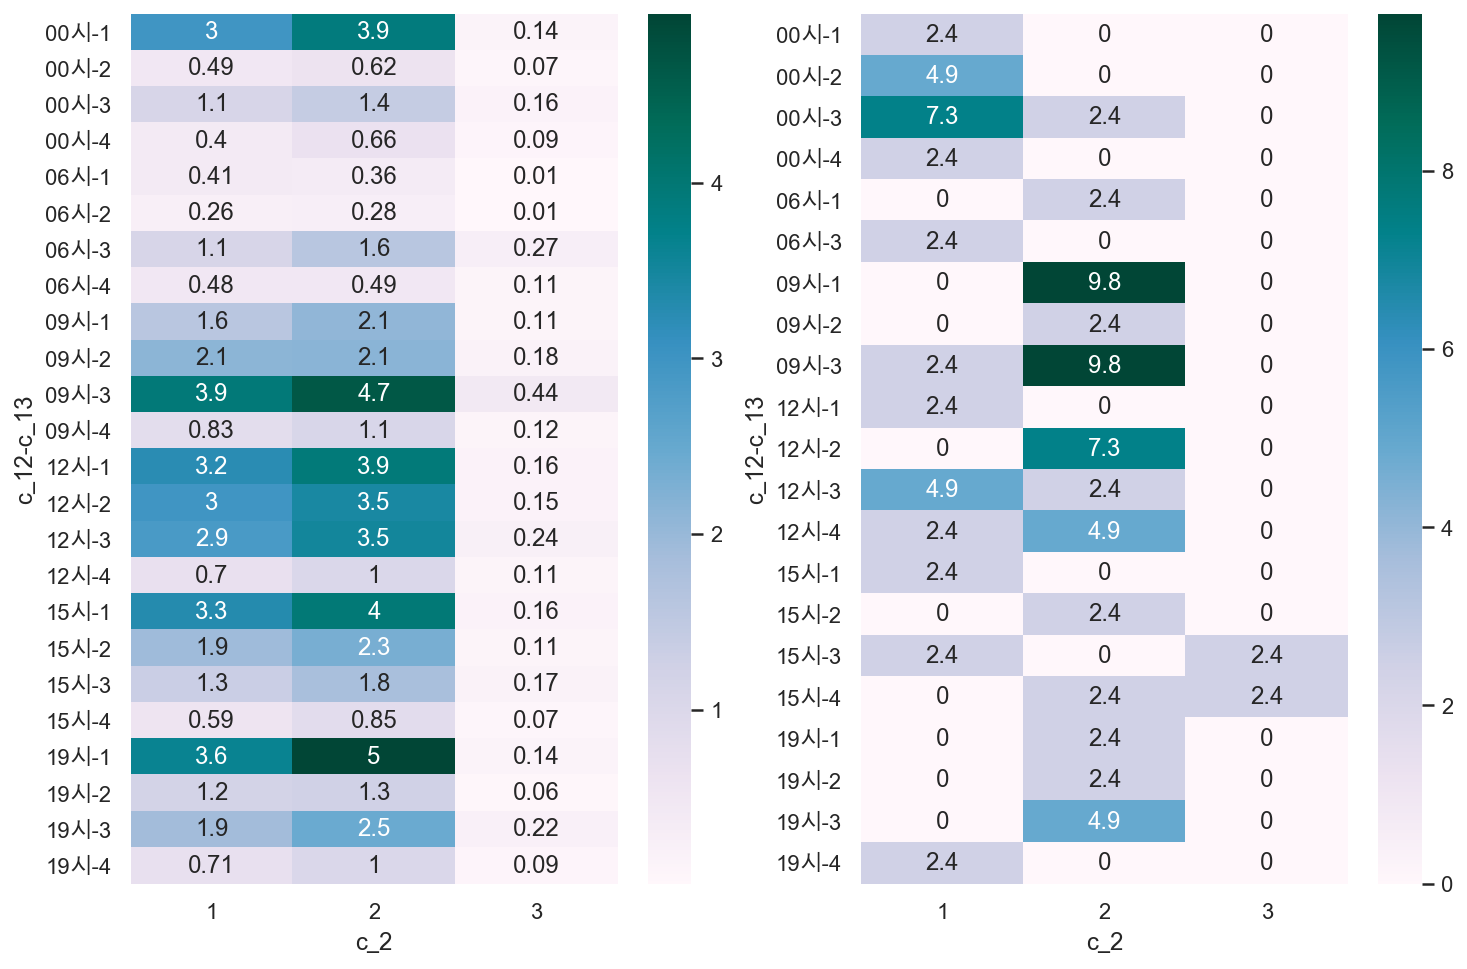

In [20]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots(1,2, figsize=(12,8))
sns.heatmap(df_tmp, ax=ax[0], cmap="PuBuGn",annot=True)
sns.heatmap(df_tmp2, ax=ax[1], cmap="PuBuGn",annot=True);

# c2 = 2의 오전, 낮 대여에 눈에 띄는 분포차이 존재 => 차이값 비교가 필요

### True, False 간 각각의 비율의 차이

In [21]:
df_tmp = df_fr_f.pivot_table(index=['c_12','c_13'], columns='c_2', values='c_1', aggfunc=np.ma.count)
df_tmp = round(df_tmp * 100 / len(df), 2)
df_tmp = df_tmp.fillna(0)
df_tmp = df_tmp.drop(5, level=1)
df_tmp = df_tmp.drop([4,5], axis=1)
df_tmp = df_tmp.rename(index={1:" 0시", 2:"19시", 3: " 6시", 4: " 9시", 5: "12시", 6: "15시"}, level=0).sort_index()
df_tmp = df_tmp.rename(index={1:" 4시간", 2:" 8시간", 3: "36시간", 4: "48시간"}, level=1)

df_tmp2 = df_fr_t.pivot_table(index=['c_12','c_13'], columns='c_2', values='c_1', aggfunc=np.ma.count)
df_tmp2 = round(df_tmp2 * 100 / len(df_fr_t), 2)
df_tmp2 = df_tmp2.fillna(0)
df_tmp2 = df_tmp2.rename(index={1:" 0시", 2:"19시", 3: " 6시", 4: " 9시", 5: "12시", 6: "15시"}, level=0).sort_index()
df_tmp2 = df_tmp2.rename(index={1:" 4시간", 2:" 8시간", 3: "36시간", 4: "48시간"}, level=1)

df_tmp3 = df_tmp2 - df_tmp
df_tmp3 = df_tmp3.fillna(0)
df_tmp3.head()

c_2            1      2      3
c_12 c_13                     
 0시   4시간 -0.540 -3.890 -0.140
      8시간  4.390 -0.620 -0.070
     36시간  6.210  1.020 -0.160
     48시간  2.040 -0.660 -0.090
 6시   4시간 -0.410  2.080 -0.010

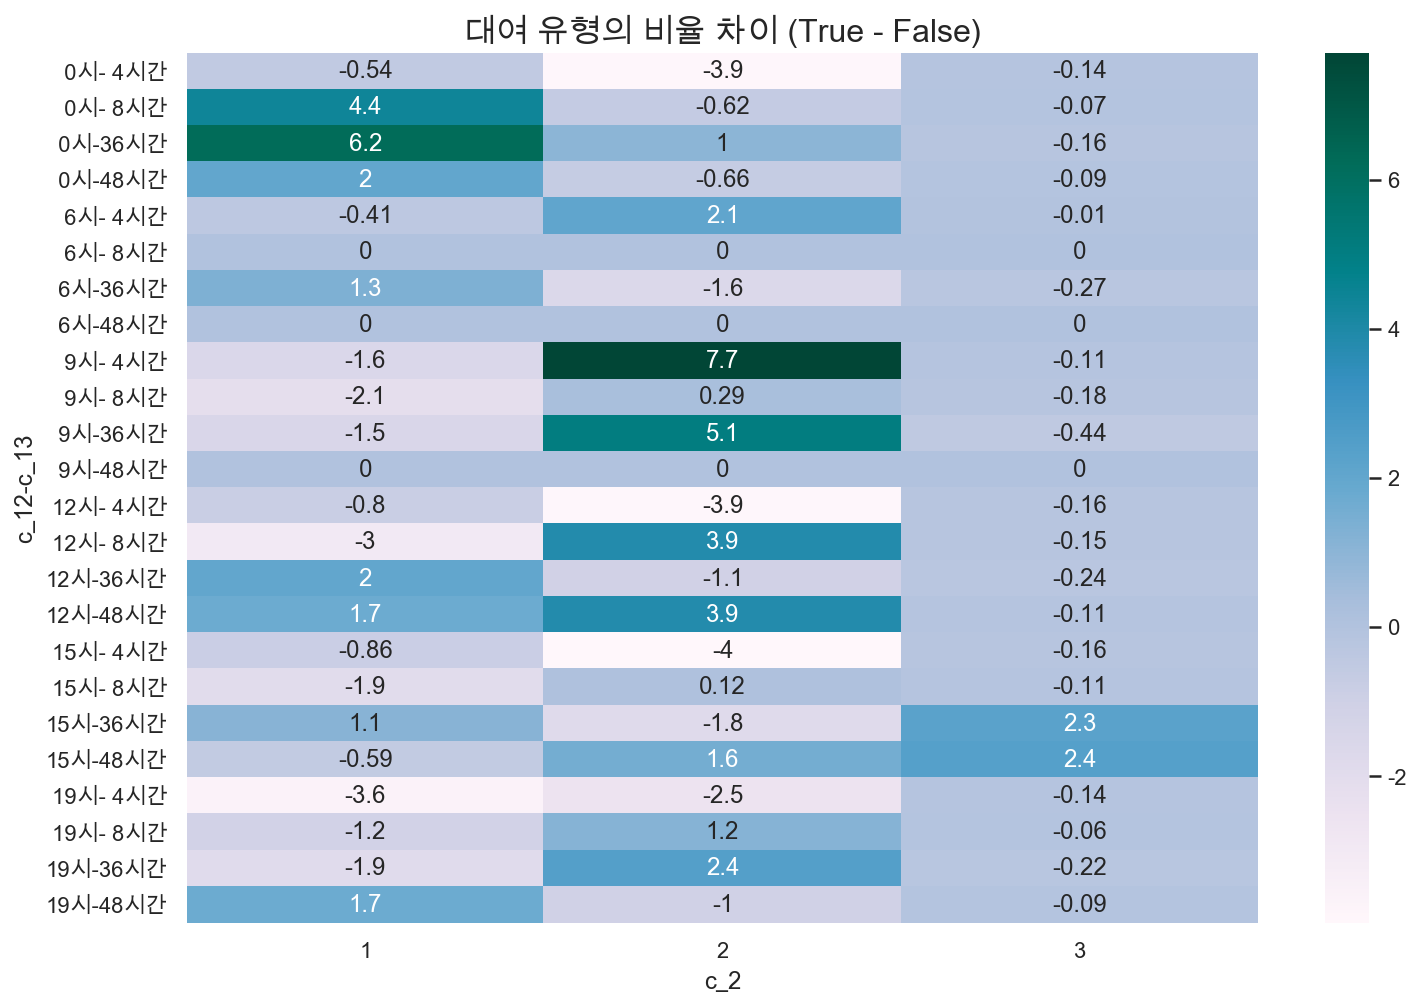

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df_tmp3, cmap="PuBuGn", annot=True);
plt.title('대여 유형의 비율 차이 (True - False)', fontsize=16);

## 5. 일반 사고와 다른 특이한 패턴이 있을까?

In [25]:
df_tmp = df_fr_f.pivot_table(index=['c_14','c_17'], columns='c_2', values='c_1', aggfunc=np.ma.count)
df_tmp = round(df_tmp * 100 / len(df), 2)
df_tmp = df_tmp.fillna(0)
df_tmp = df_tmp.drop(-1, level=0)
df_tmp = df_tmp.drop([5,3], level=1)
df_tmp = df_tmp.drop([4,5], axis=1)
df_tmp = df_tmp.rename(index={1:" 0시", 2:"19시", 3: " 6시", 4: " 9시", 5: "12시", 6: "15시"}, level=0).sort_index()
df_tmp.head()

c_2           1     2     3
c_14 c_17                  
 0시  0    2.460 2.870 0.200
     1    4.210 5.610 0.360
     2    0.890 1.340 0.110
     4    1.510 1.940 0.090
 6시  0    0.220 0.350 0.020

In [26]:
df_tmp2 = df_fr_t.pivot_table(index=['c_14','c_17'], columns='c_2', values='c_1', aggfunc=np.ma.count)
df_tmp2 = round(df_tmp2 * 100 / len(df_fr_t), 2)
df_tmp2 = df_tmp2.fillna(0)
df_tmp2 = df_tmp2.rename(index={1:" 0시", 2:"19시", 3: " 6시", 4: " 9시", 5: "12시", 6: "15시"}, level=0).sort_index()
df_tmp2.head()

c_2           1     2     3
c_14 c_17                  
 0시  0    7.320 2.440 0.000
     1    9.760 4.880 0.000
     2    2.440 0.000 0.000
     4    0.000 2.440 0.000
 6시  0    2.440 0.000 0.000

<Figure size 432x288 with 0 Axes>

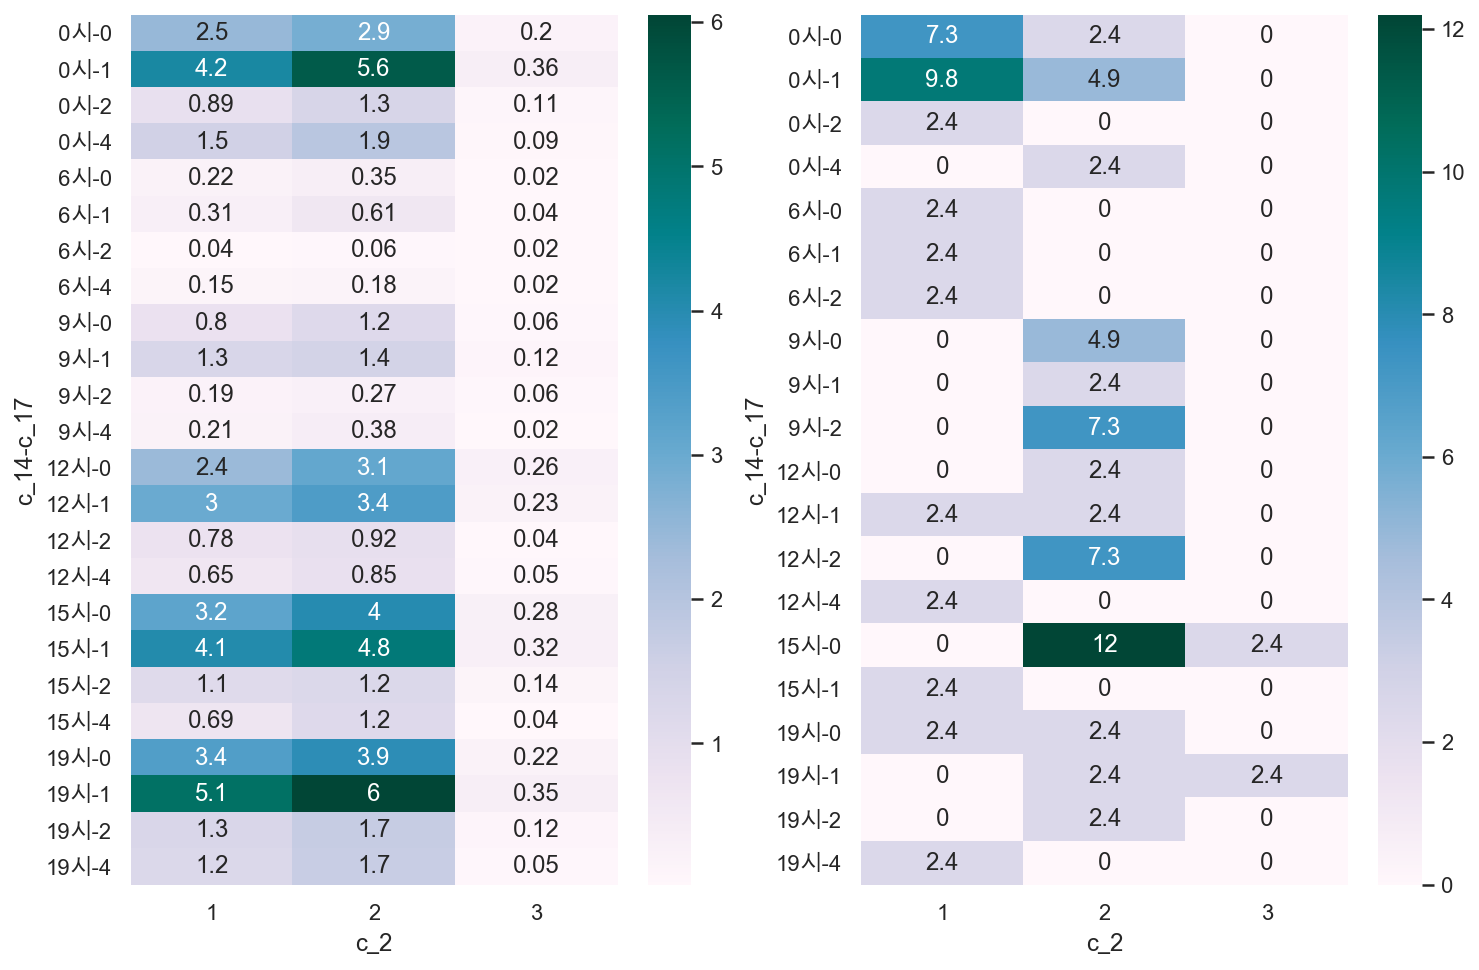

In [27]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots(1,2, figsize=(12,8))
sns.heatmap(df_tmp, ax=ax[0], cmap="PuBuGn",annot=True)
sns.heatmap(df_tmp2, ax=ax[1], cmap="PuBuGn",annot=True);

In [29]:
df_tmp = df_fr_f.pivot_table(index=['c_14','c_17'], columns='c_2', values='c_1', aggfunc=np.ma.count)
df_tmp = round(df_tmp * 100 / len(df), 2)
df_tmp = df_tmp.fillna(0)
df_tmp = df_tmp.drop(-1, level=0)
df_tmp = df_tmp.drop([5,3], level=1)
df_tmp = df_tmp.drop([4,5], axis=1)
df_tmp = df_tmp.rename(index={1:" 0시", 2:"19시", 3: " 6시", 4: " 9시", 5: "12시", 6: "15시"}, level=0).sort_index()

df_tmp2 = df_fr_t.pivot_table(index=['c_14','c_17'], columns='c_2', values='c_1', aggfunc=np.ma.count)
df_tmp2 = round(df_tmp2 * 100 / len(df_fr_t), 2)
df_tmp2 = df_tmp2.fillna(0)
df_tmp2 = df_tmp2.rename(index={1:" 0시", 2:"19시", 3: " 6시", 4: " 9시", 5: "12시", 6: "15시"}, level=0).sort_index()

df_tmp3 = df_tmp2 - df_tmp
df_tmp3 = df_tmp3.fillna(0)
df_tmp3 = df_tmp3.rename(index={0:"주차장", 1:"일반도로", 2:"이면도로", 3:"고속도로", 4:"존"}, level=1)

df_tmp3.head()

c_2            1      2      3
c_14 c_17                     
 0시  주차장   4.860 -0.430 -0.200
     일반도로  5.550 -0.730 -0.360
     이면도로  1.550 -1.340 -0.110
     존    -1.510  0.500 -0.090
 6시  주차장   2.220 -0.350 -0.020

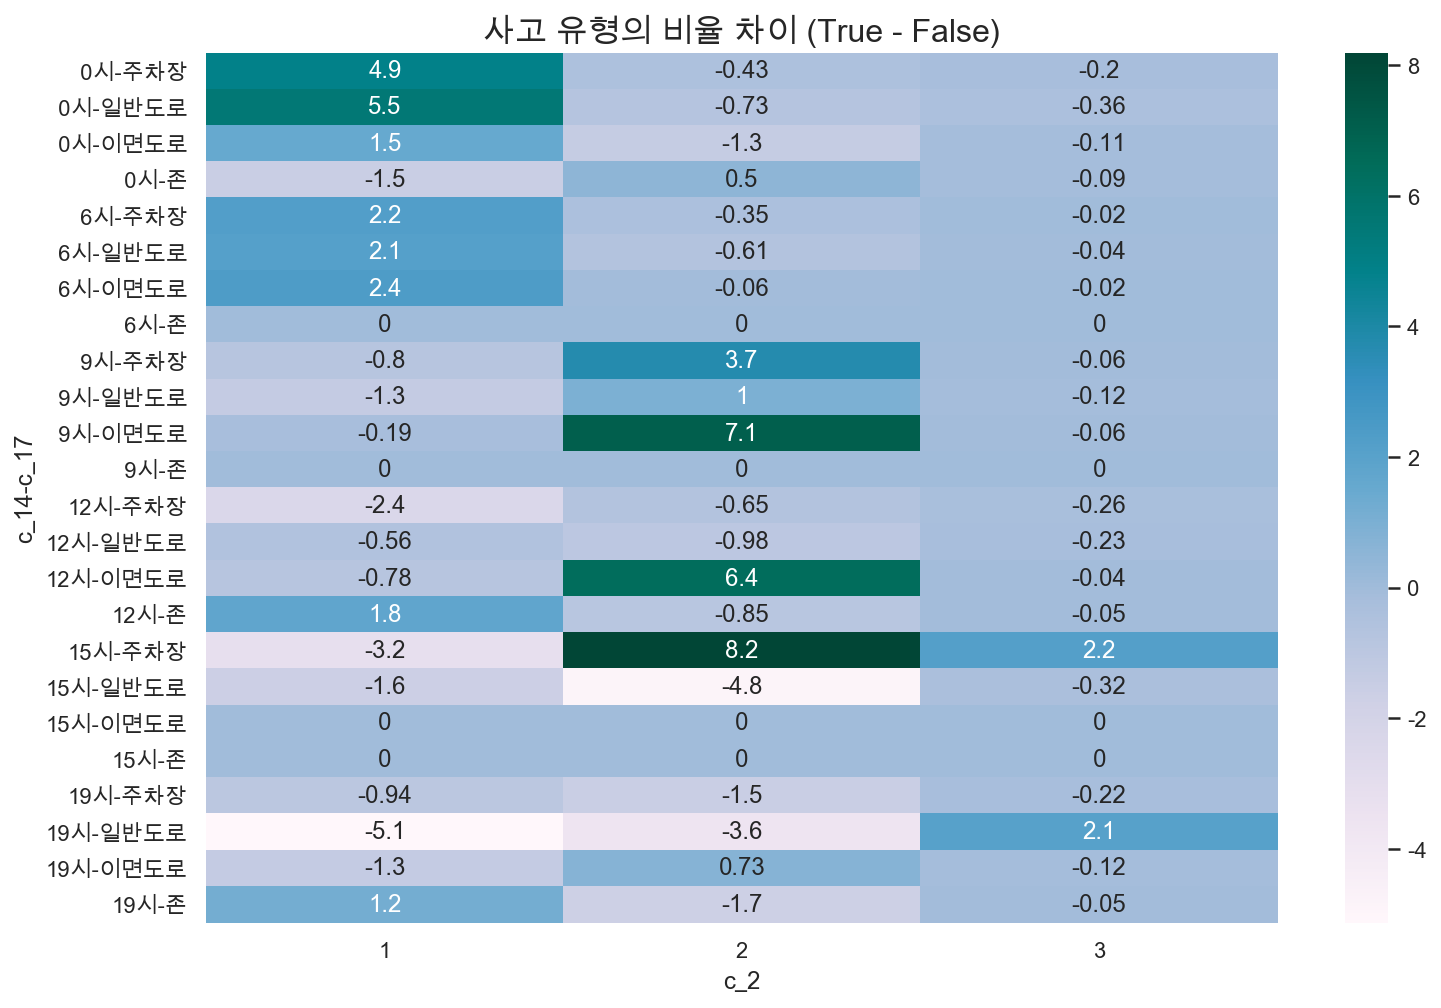

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df_tmp3, cmap="PuBuGn", annot=True);
plt.title('사고 유형의 비율 차이 (True - False)', fontsize=16);

## 두 특성 조합 비교

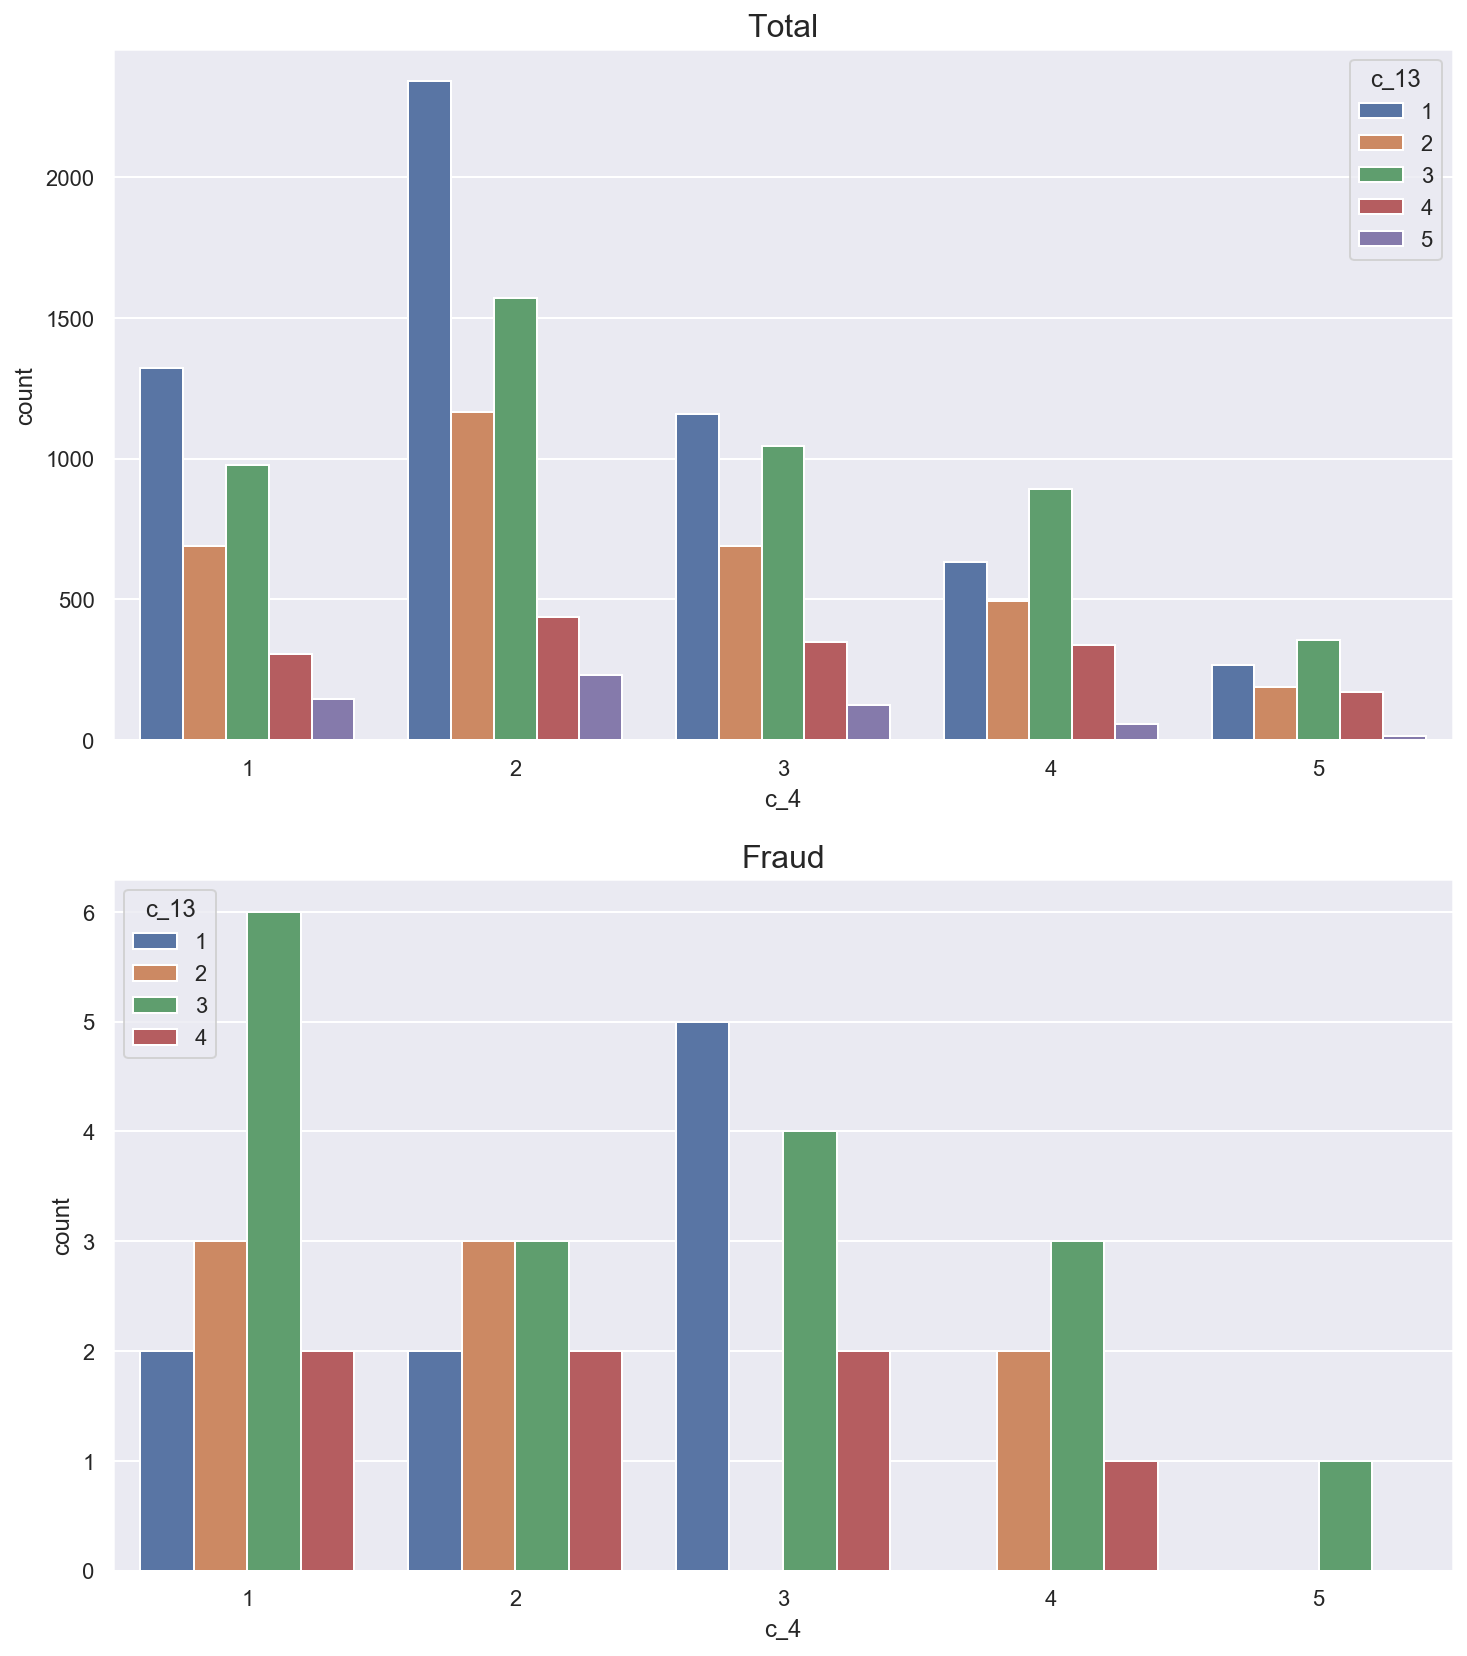

<Figure size 864x576 with 0 Axes>

In [37]:
# 나이와 대여기간
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.figure(figsize=(12,8))
sns.countplot(x='c_4',hue='c_13' ,data=df_fr_f, ax=ax[0])
ax[0].set_title('Total', fontsize=16)
sns.countplot(x='c_4',hue='c_13' ,data=df_fr_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16);

# 전체와 다른 분포양상

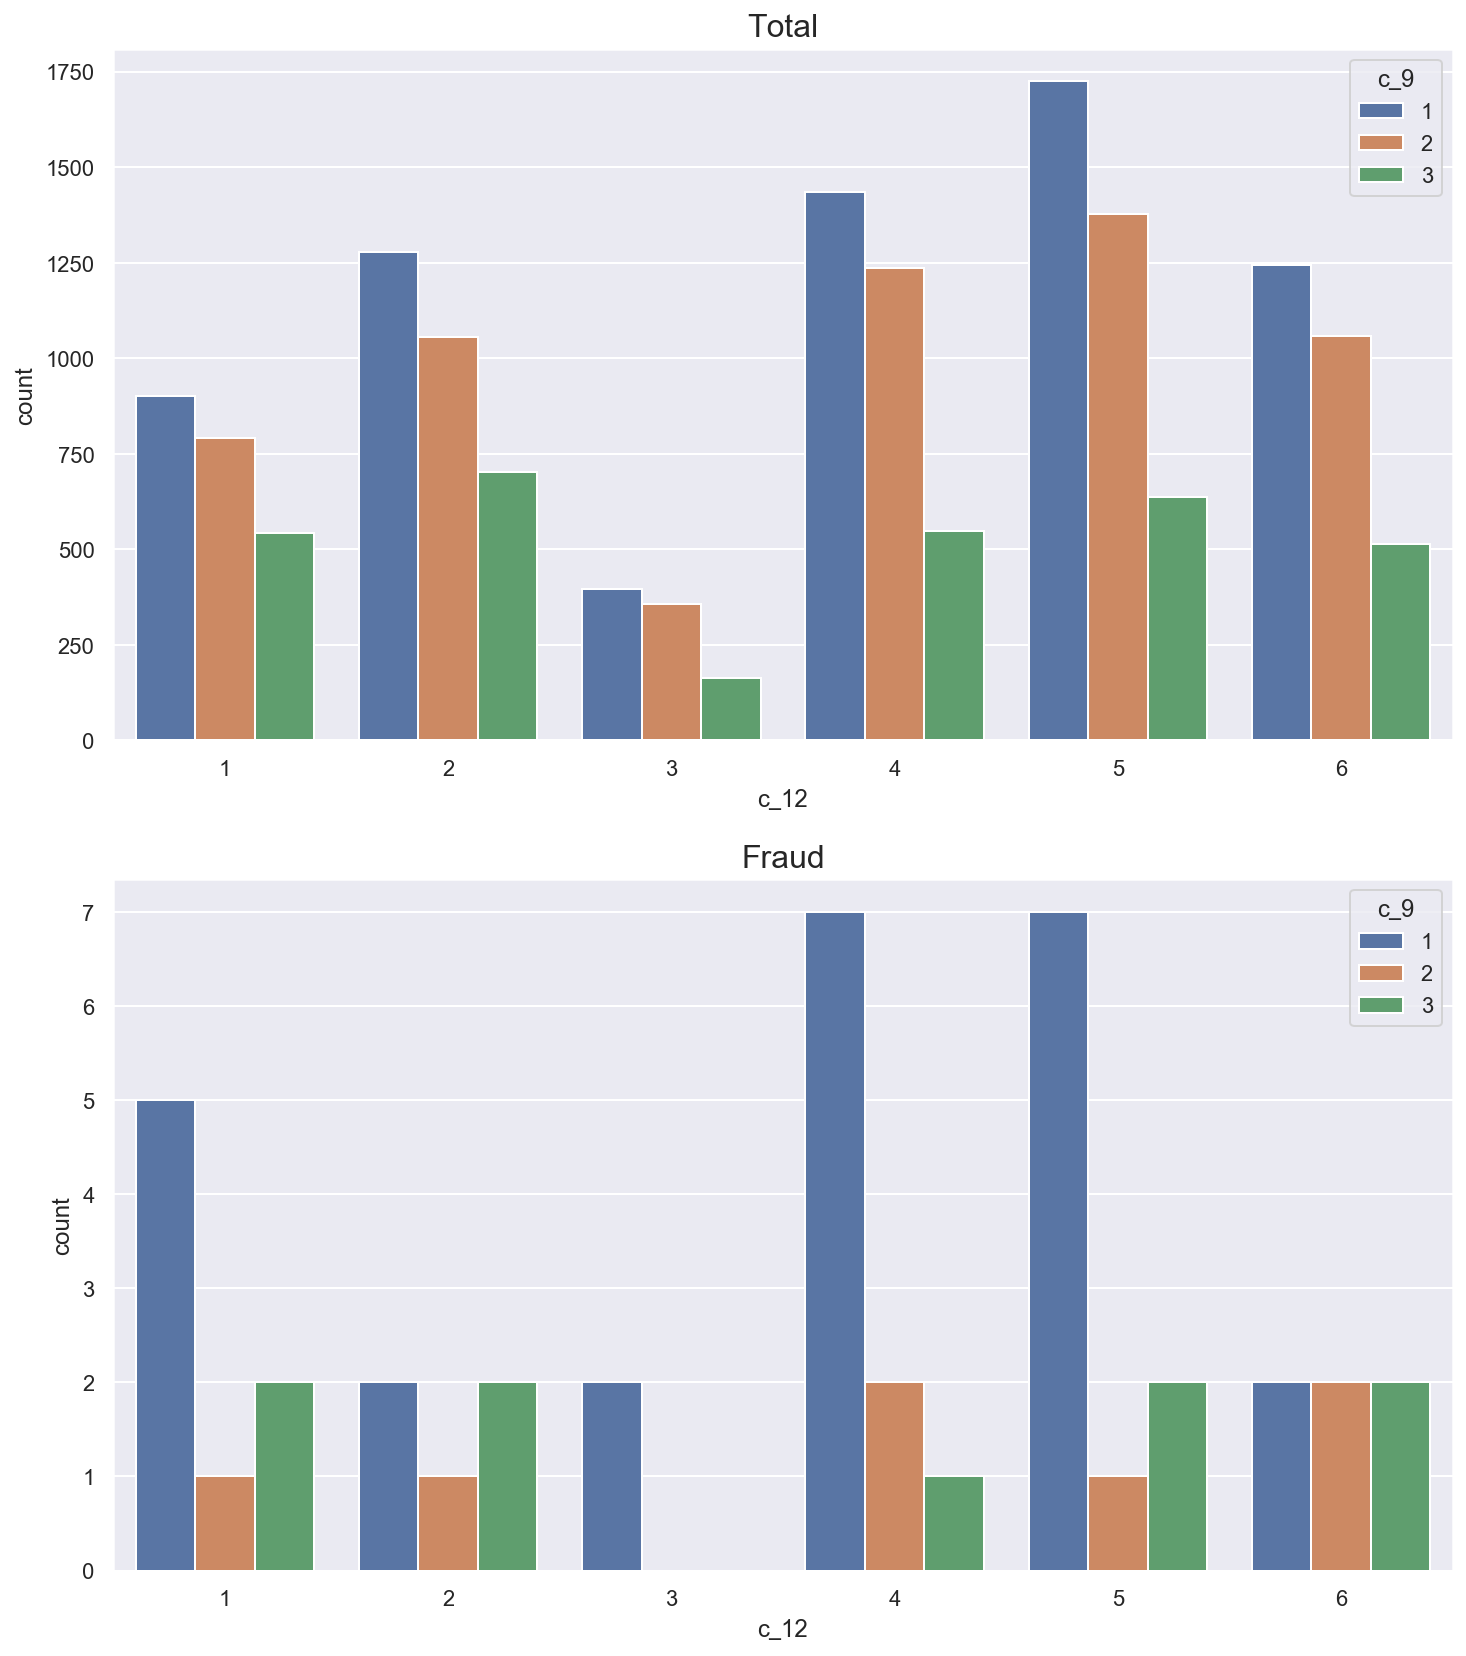

<Figure size 864x576 with 0 Axes>

In [36]:
# 시작시간과 보험
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.figure(figsize=(12,8))
sns.countplot(x='c_12',hue='c_9' ,data=df_fr_f, ax=ax[0])
ax[0].set_title('Total', fontsize=16)
sns.countplot(x='c_12',hue='c_9' ,data=df_fr_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16);

# 시간대와 상관없이 비싼 보험

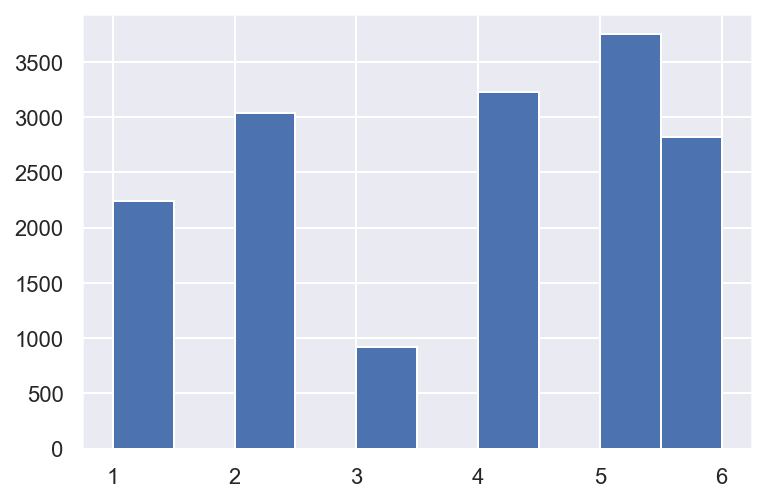

In [33]:
plt.hist(x='c_12',data=df);

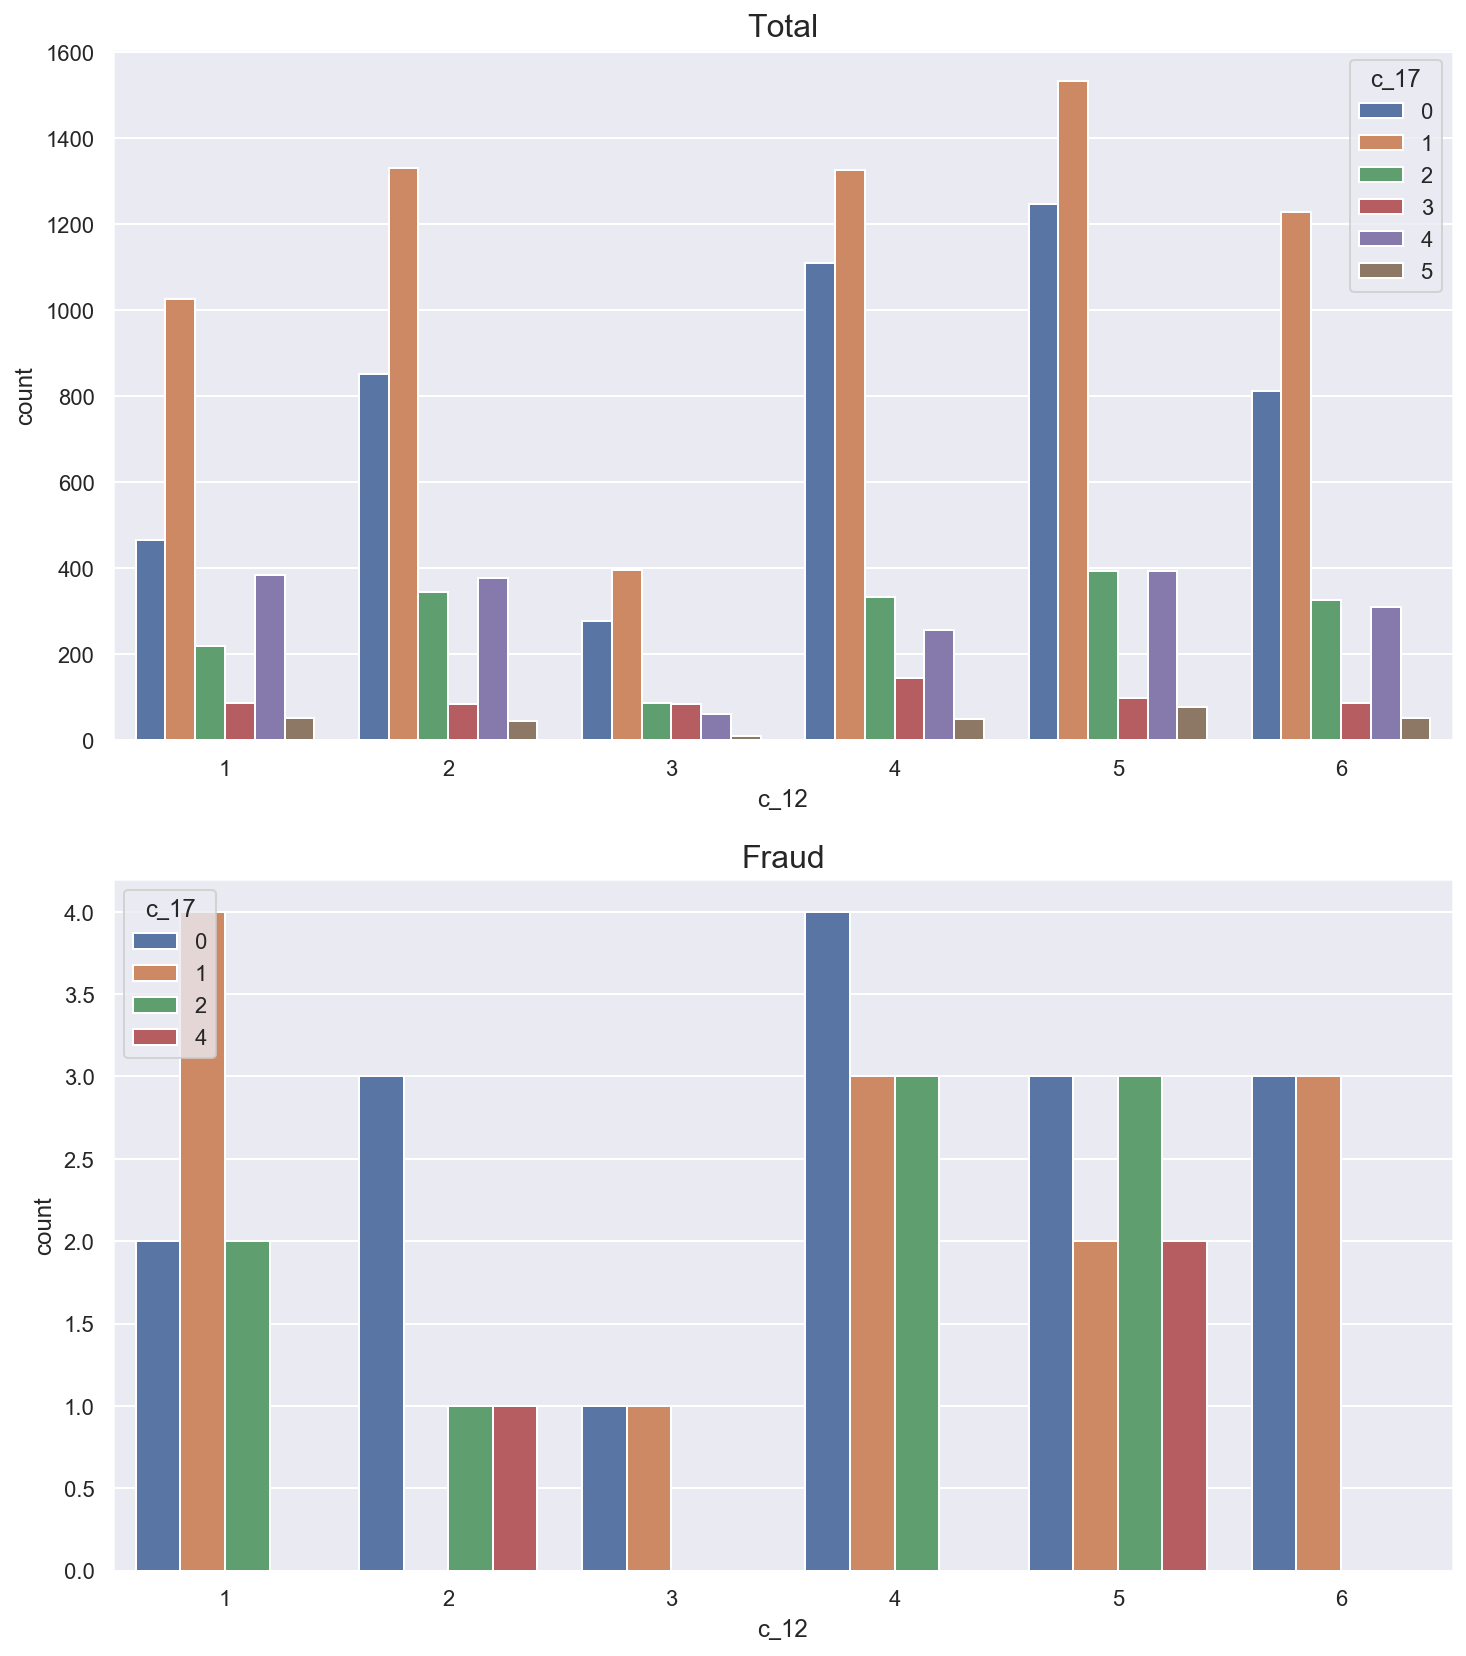

<Figure size 864x576 with 0 Axes>

In [38]:
# 사고지점, 위치
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.figure(figsize=(12,8))
sns.countplot(x='c_12',hue='c_17' ,data=df_fr_f, ax=ax[0])
ax[0].set_title('Total', fontsize=16)
sns.countplot(x='c_12',hue='c_17' ,data=df_fr_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16);

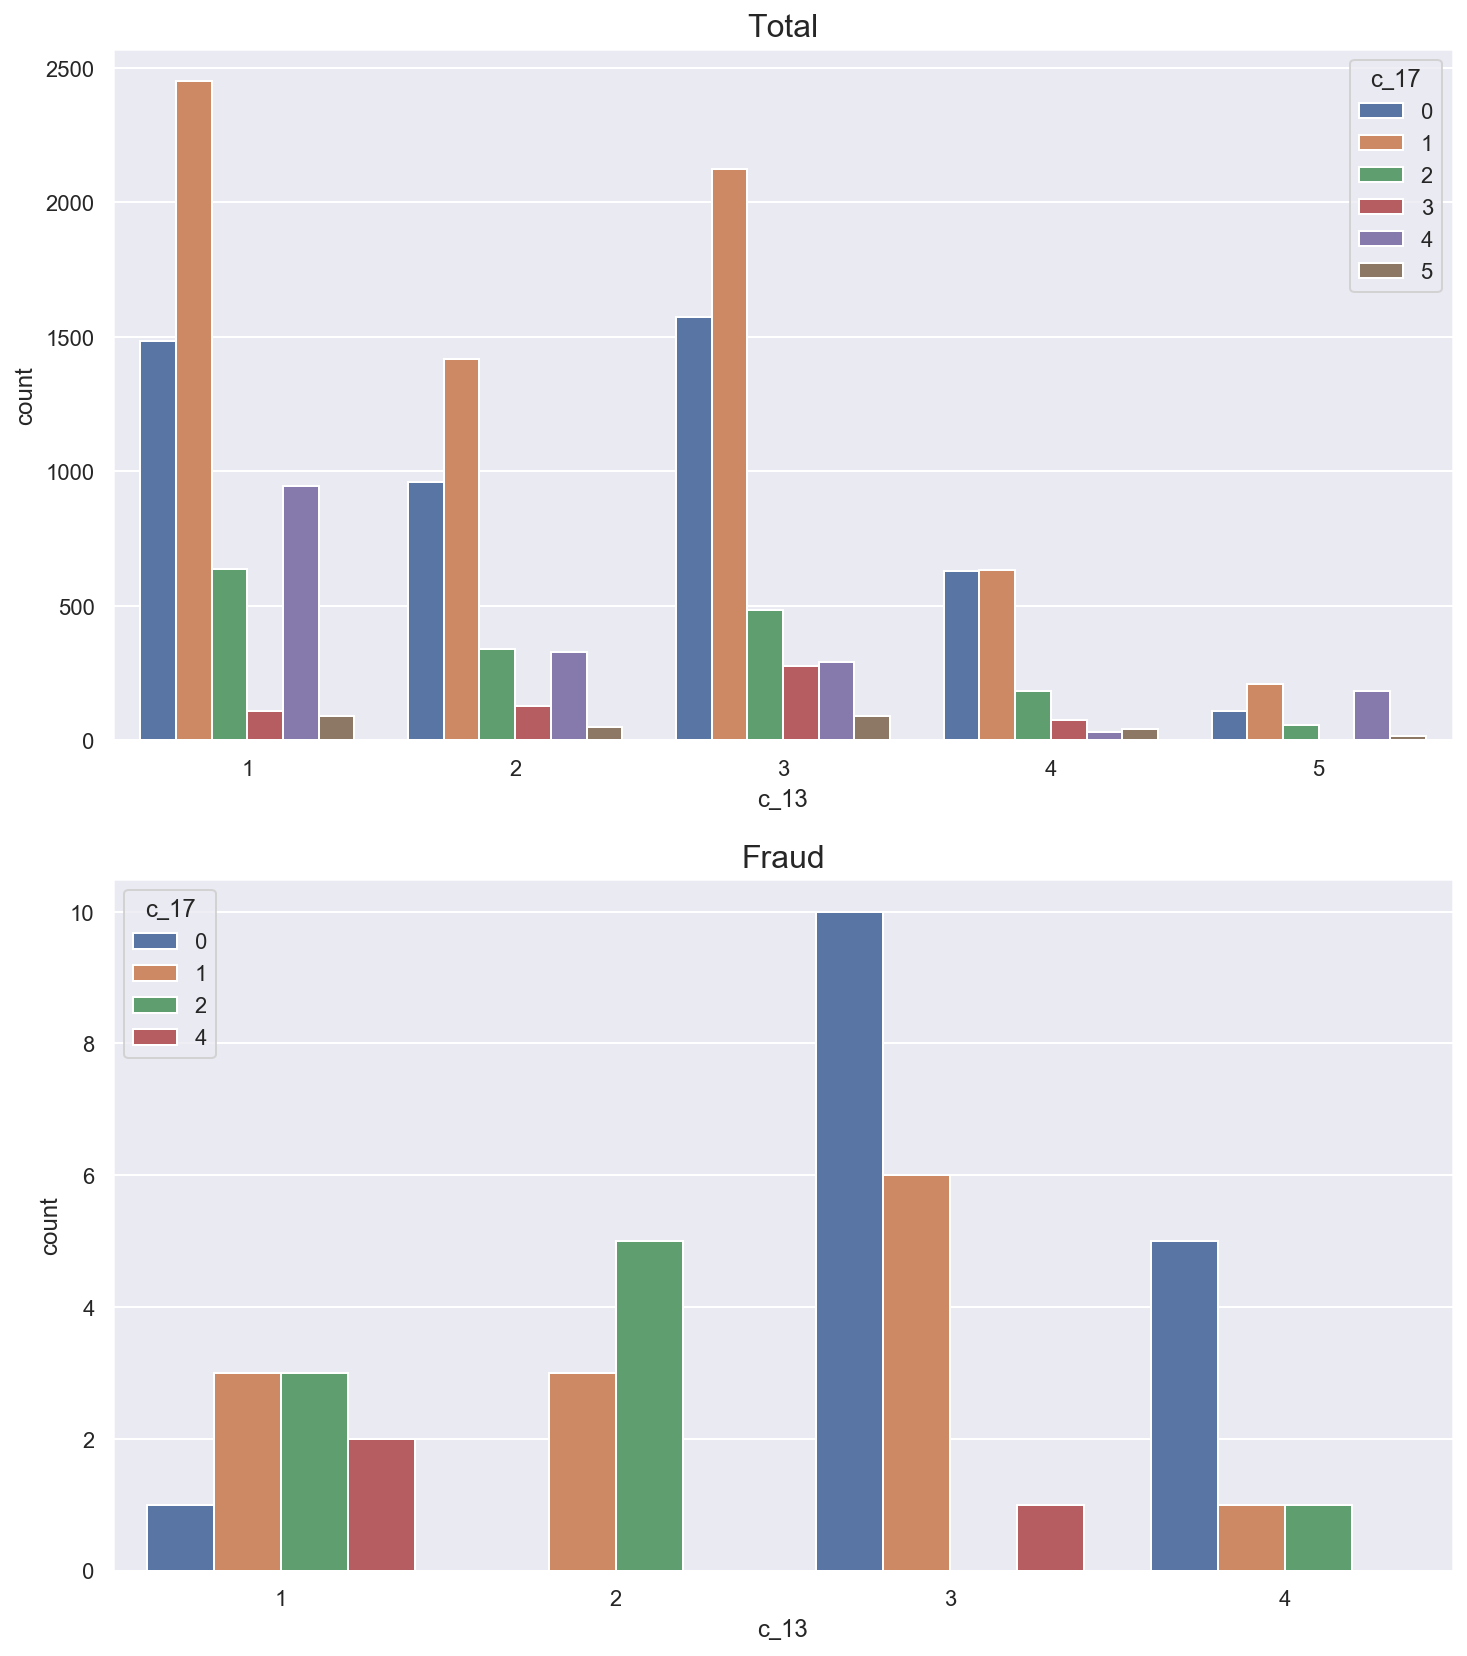

<Figure size 864x576 with 0 Axes>

In [41]:
# 사고지점, 기간
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.figure(figsize=(12,8))
sns.countplot(x='c_13',hue='c_17' ,data=df_fr_f, ax=ax[0])
ax[0].set_title('Total', fontsize=16)
sns.countplot(x='c_13',hue='c_17' ,data=df_fr_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16);

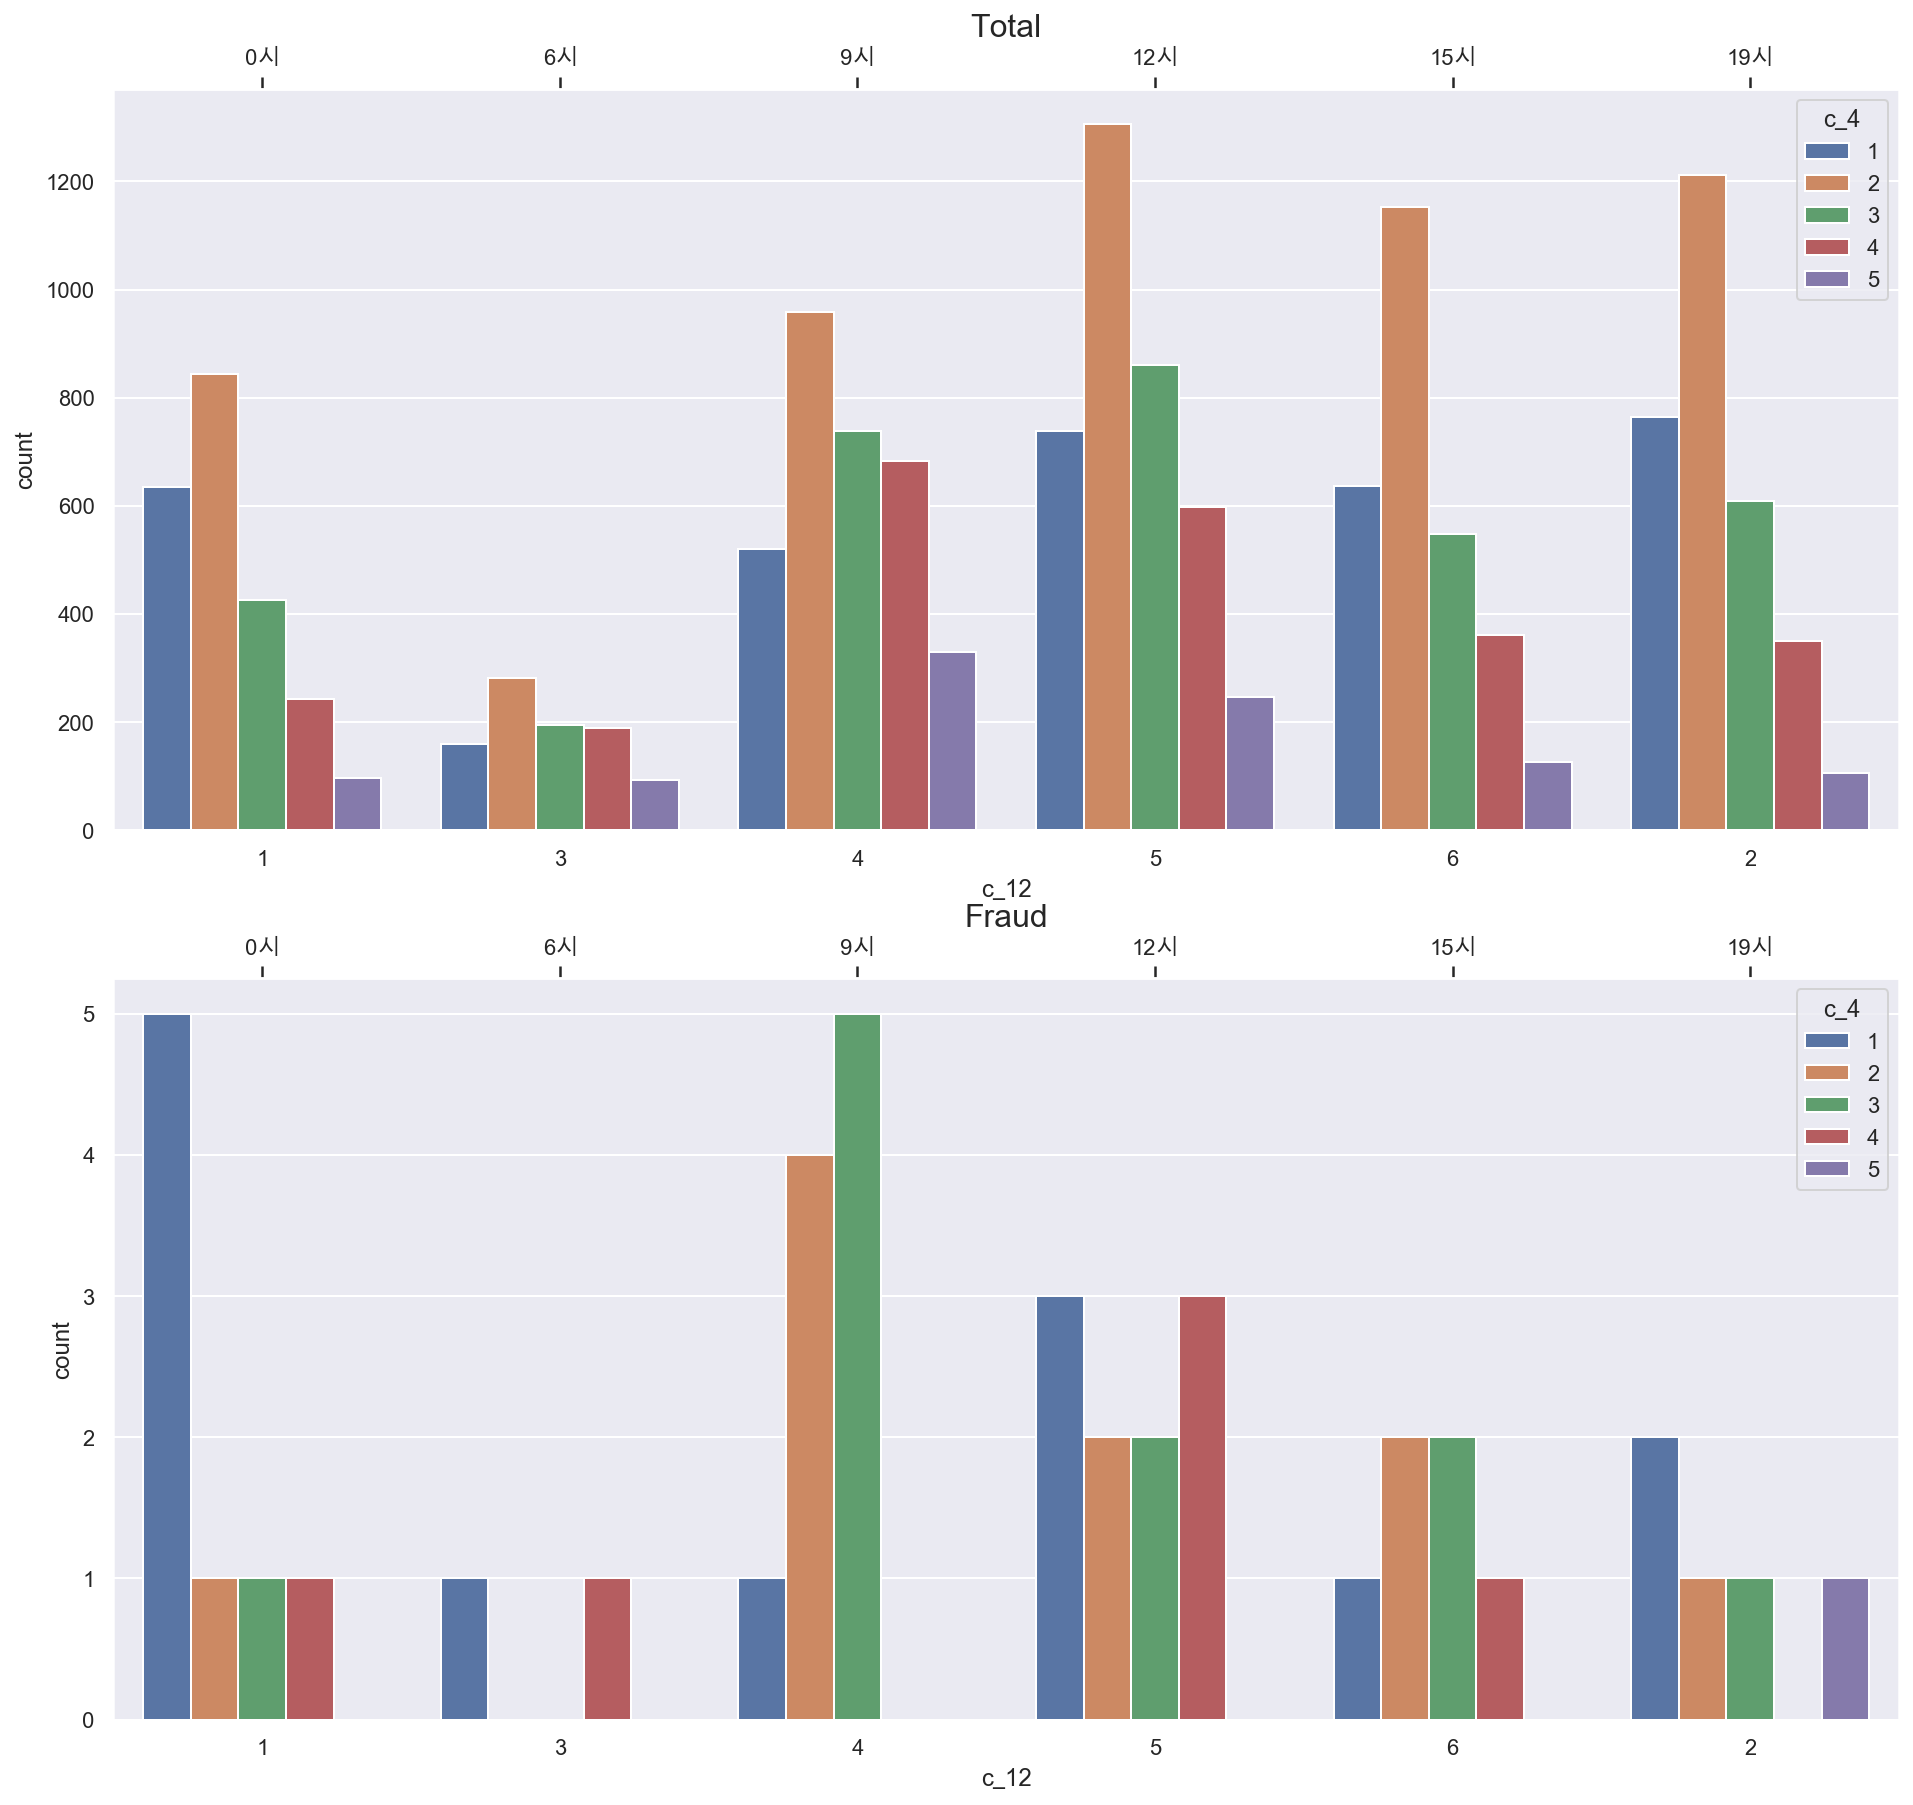

<Figure size 864x576 with 0 Axes>

In [42]:
# 빌린시간, 나이
fig, ax = plt.subplots(2, 1, figsize=(16, 15))
plt.figure(figsize=(12,8))

sns.countplot(x='c_12',hue='c_4' ,data=df, ax=ax[0], order=[1,3,4,5,6,2])
ax[0].set_title('Total', fontsize=16)
ax_t = ax[0].secondary_xaxis('top')
ax_t.set_xticks(ticks=np.arange(7))
ax_t.set_xticklabels(labels = ['0시','6시','9시','12시','15시','19시','22시'])

sns.countplot(x='c_12',hue='c_4' ,data=df_fr_t, ax=ax[1], order=[1,3,4,5,6,2])
ax[1].set_title('Fraud', fontsize=16);
ax_t = ax[1].secondary_xaxis('top')
ax_t.set_xticks(ticks=np.arange(7))
ax_t.set_xticklabels(labels = ['0시','6시','9시','12시','15시','19시','22시']);

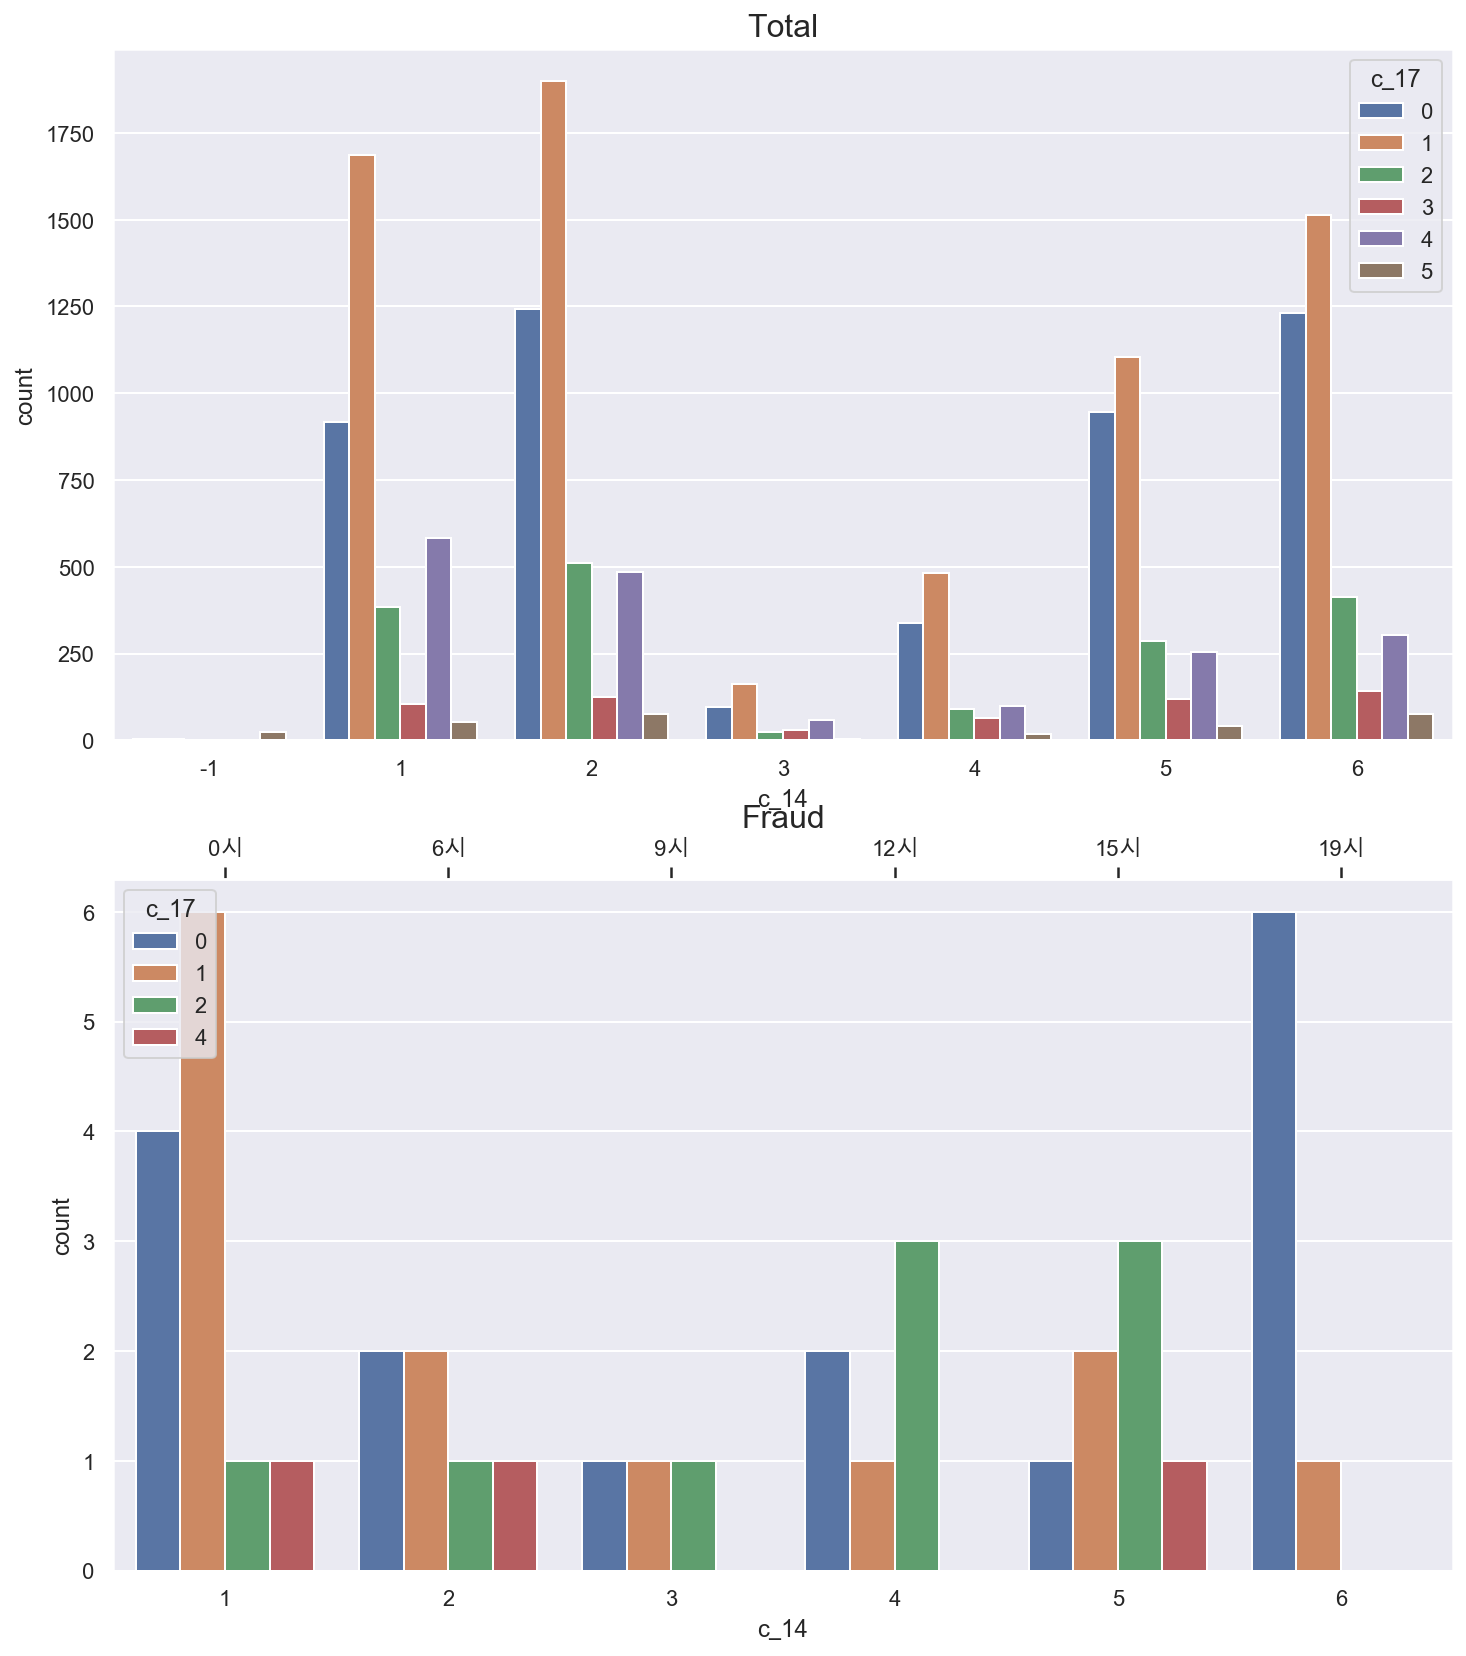

<Figure size 864x576 with 0 Axes>

In [45]:
# 사고시간, 사고위치
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.figure(figsize=(12,8))
sns.countplot(x='c_14',hue='c_17' ,data=df, ax=ax[0])
ax[0].set_title('Total', fontsize=16)

sns.countplot(x='c_14',hue='c_17' ,data=df_fr_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16)
ax_t = ax[1].secondary_xaxis('top')
ax_t.set_xticks(ticks=np.arange(7))
ax_t.set_xticklabels(labels = ['0시','6시','9시','12시','15시','19시','22시']);

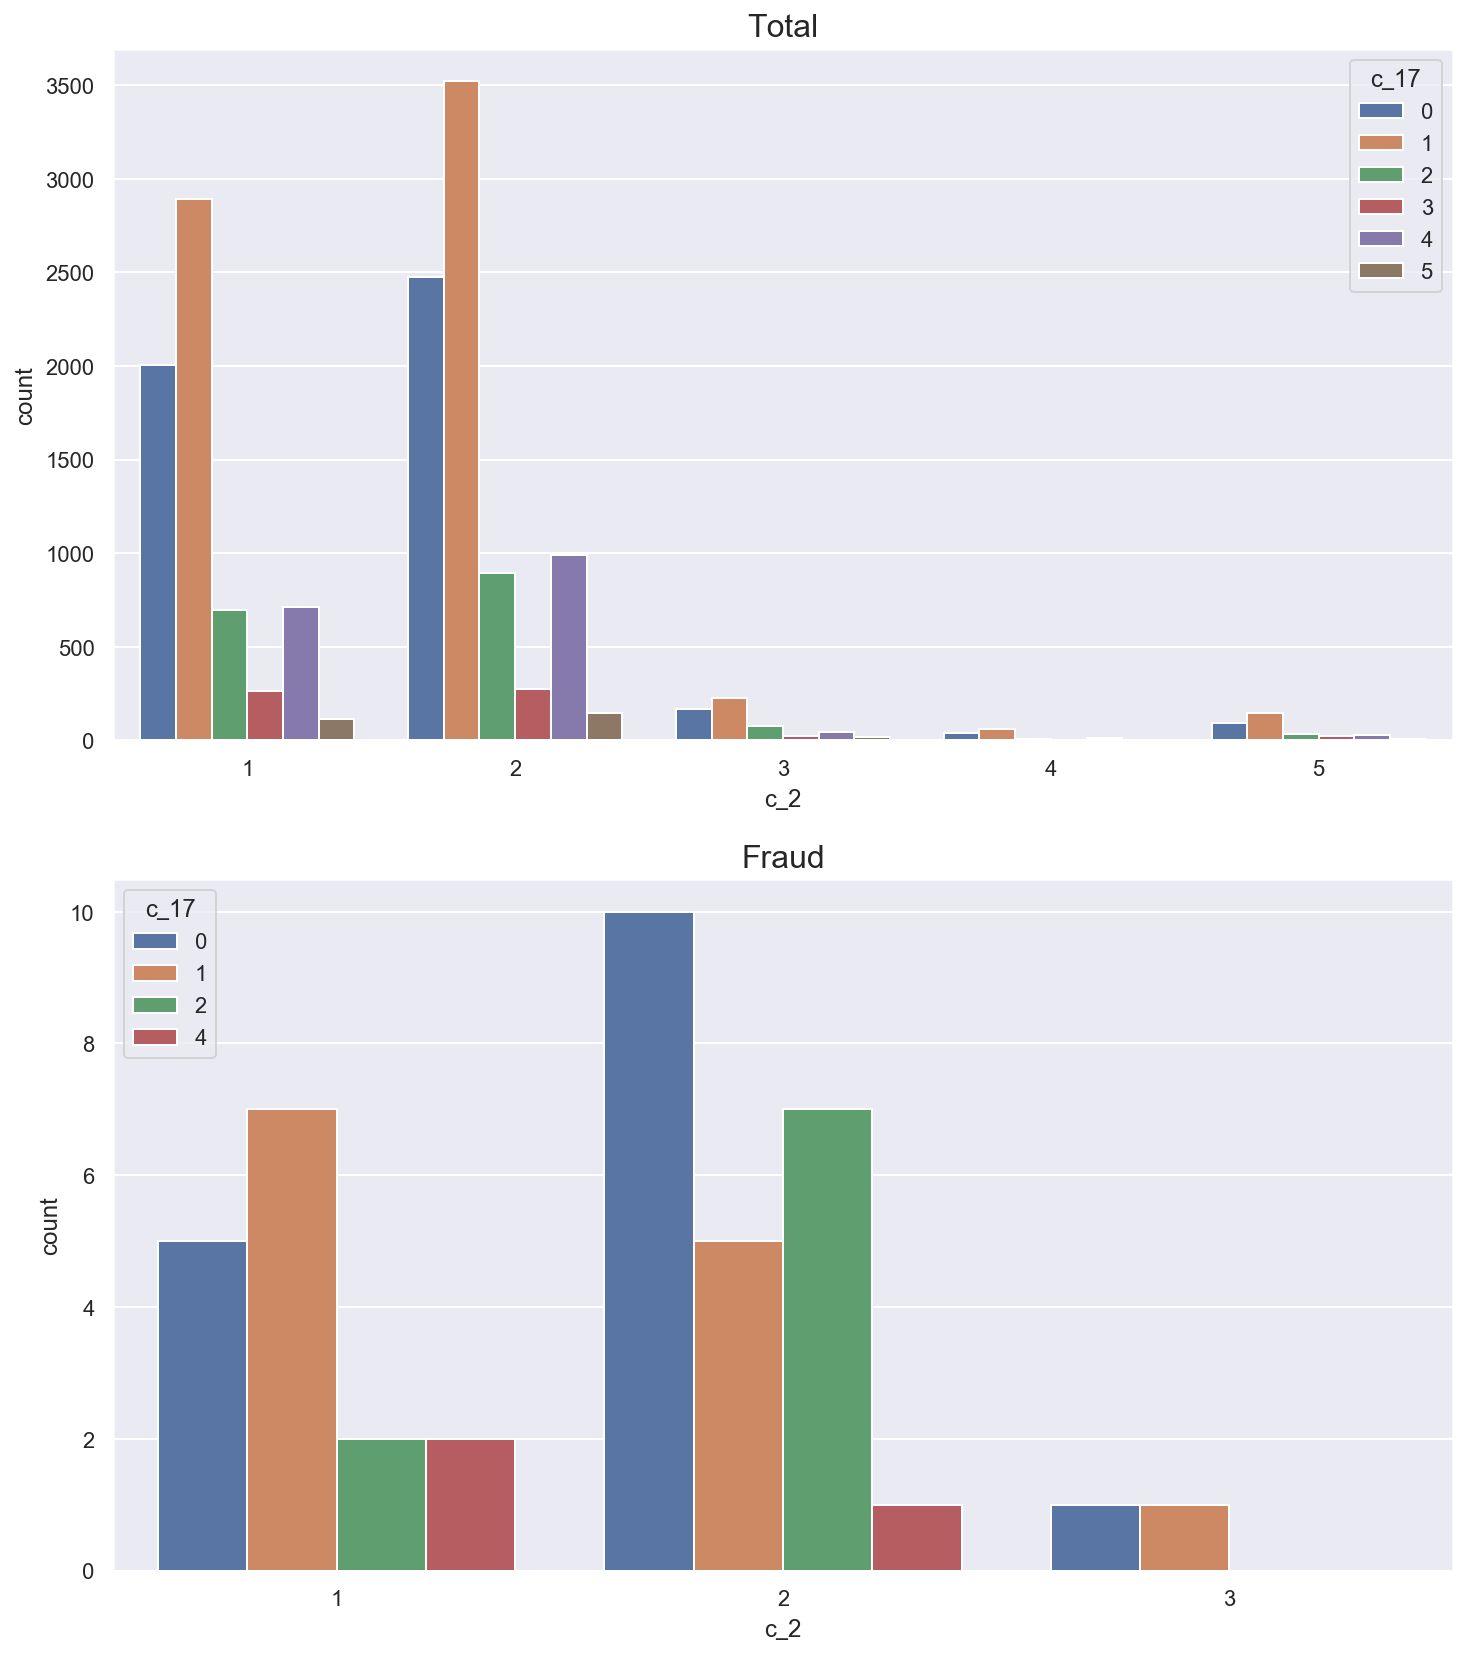

<Figure size 864x576 with 0 Axes>

In [46]:
#차종과 사고위치
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.figure(figsize=(12,8))
sns.countplot(x='c_2',hue='c_17' ,data=df, ax=ax[0])
ax[0].set_title('Total', fontsize=16)
sns.countplot(x='c_2',hue='c_17' ,data=df_fr_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16);

## 6. 사고시간과 시작시간의 차이를 구하여 EDA

In [49]:
timels = [1,3,4,5,6,2]

In [60]:
df_tmp_diff = df[df['c_14'] != -1.0][['c_1','c_4','c_9','c_12','c_14','c_13']]

diffls = []

for idx in range(len(df_tmp_diff)):
    sh = timels.index(df_tmp_diff.iloc[idx]['c_12']) +1
    ah = timels.index(df_tmp_diff.iloc[idx]['c_14']) +1

    if sh > ah:
        diff = ah + 6 - sh
    else:
        diff = ah - sh

    diffls.append(diff)
    
df_tmp_diff['diff'] = diffls

In [61]:
df_tmp_diff_f = df_tmp_diff[df_tmp_diff['c_1'] == 0]
df_tmp_diff_t = df_tmp_diff[df_tmp_diff['c_1'] == 1]

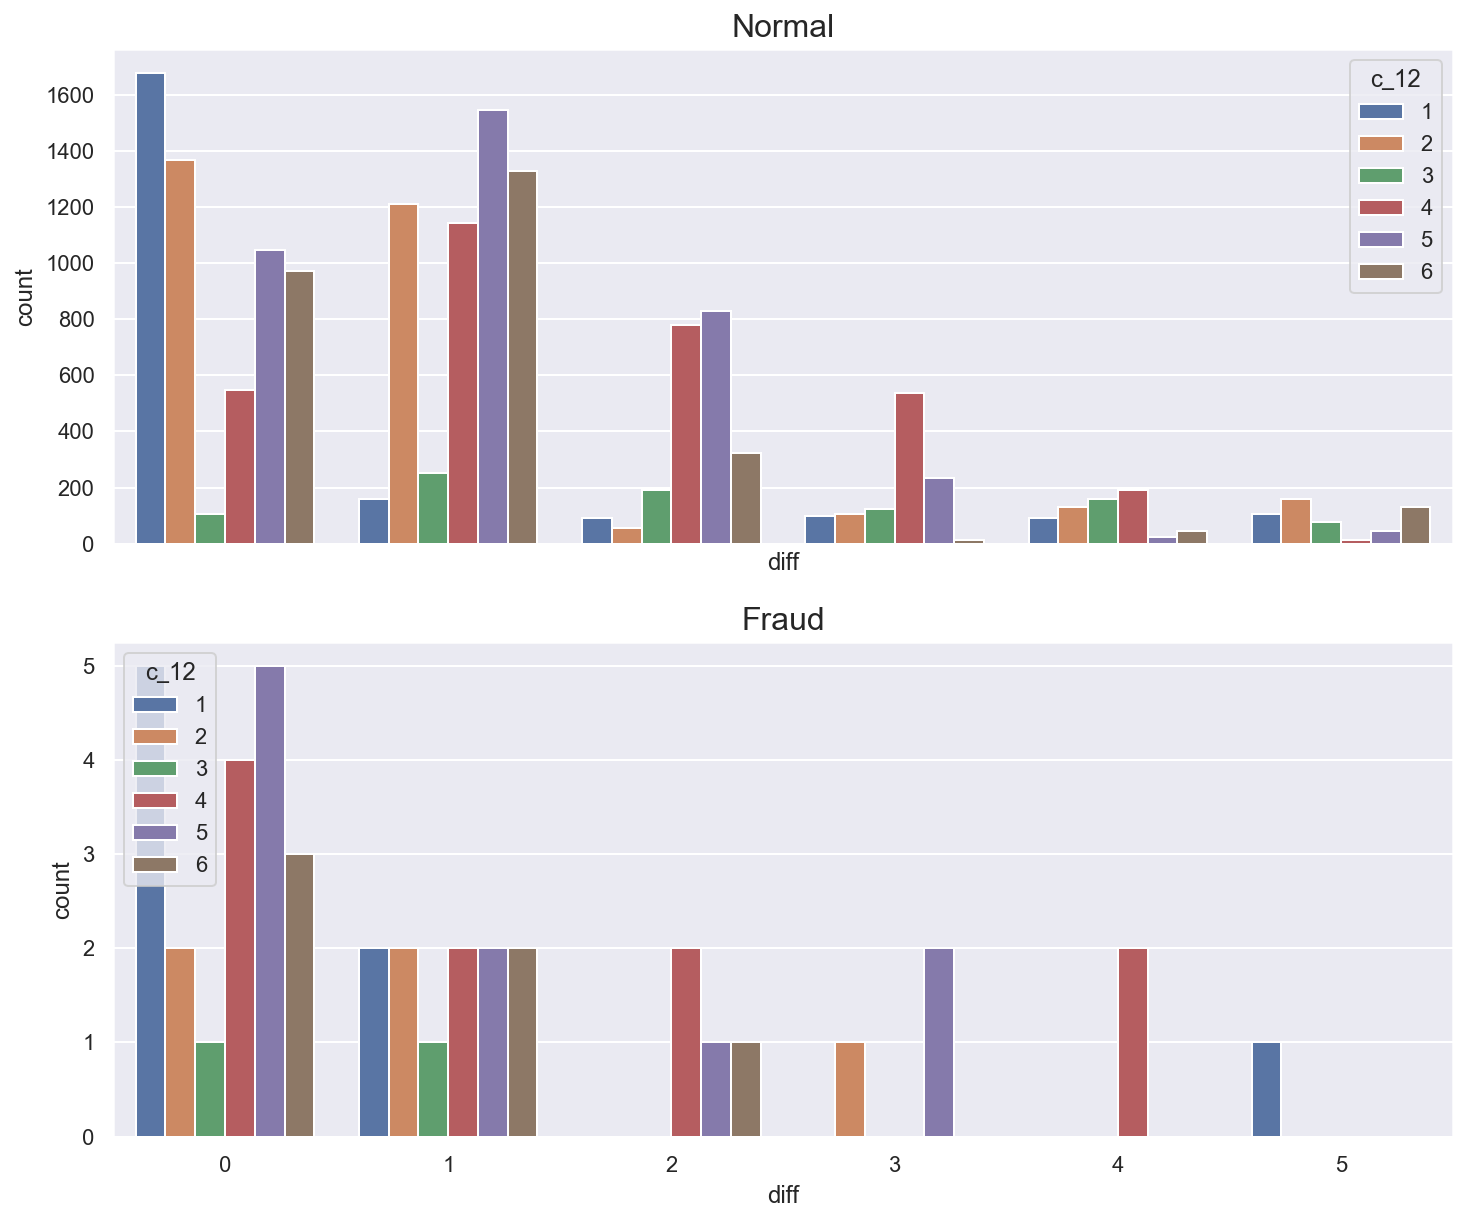

<Figure size 864x576 with 0 Axes>

In [62]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
plt.figure(figsize=(12,8))
sns.countplot(x='diff',hue='c_12' ,data=df_tmp_diff_f, ax=ax[0])
ax[0].set_title('Normal', fontsize=16)
ax[0].set_xticks([])
# ax_t = ax[0].secondary_xaxis('top')
# ax_t.set_xticks(ticks=np.arange(7))

sns.countplot(x='diff',hue='c_12' ,data=df_tmp_diff_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16);
# ax[1].set_xticks([])


### 기간이 24시 이하인 데이터만 경향 분석

In [63]:
df_tmp_diff_f12 = df_tmp_diff_f[df_tmp_diff_f['c_13'].isin([1,2])]
df_tmp_diff_t12 = df_tmp_diff_t[df_tmp_diff_t['c_13'].isin([1,2])]

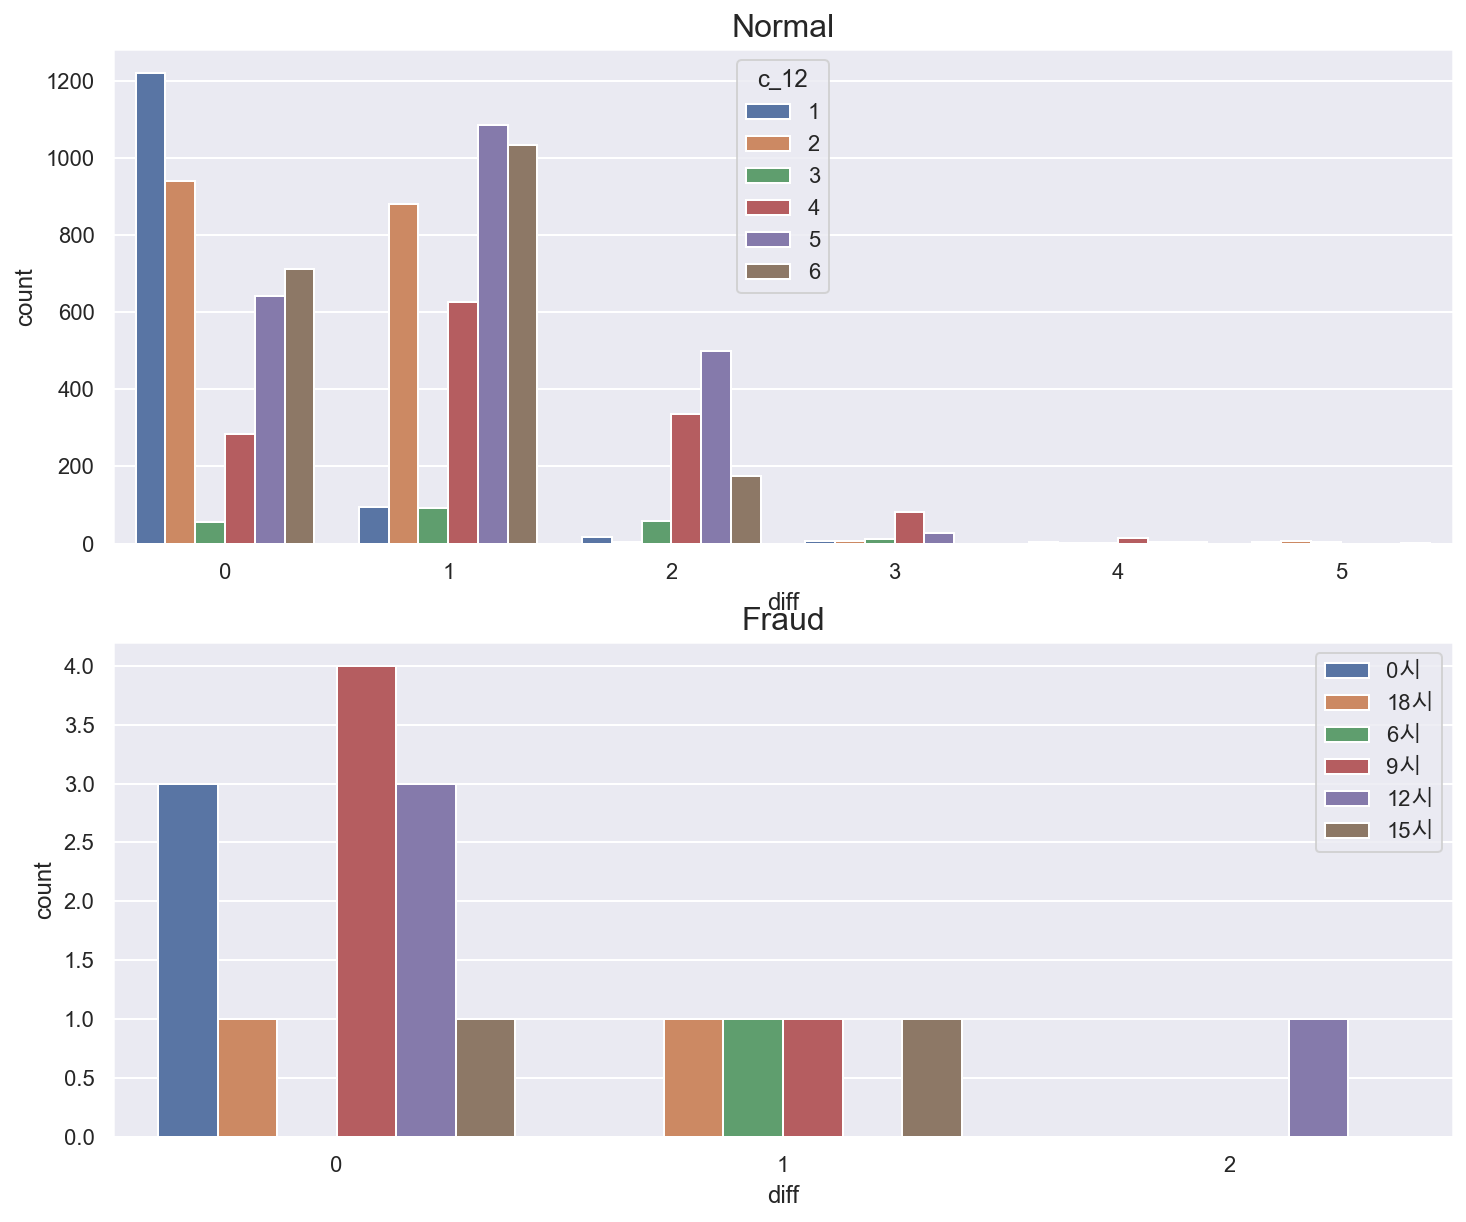

<Figure size 864x576 with 0 Axes>

In [64]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
plt.figure(figsize=(12,8))
sns.countplot(x='diff',hue='c_12' ,data=df_tmp_diff_f12, ax=ax[0])
ax[0].set_title('Normal', fontsize=16)

sns.countplot(x='diff',hue='c_12' ,data=df_tmp_diff_t12, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16)
ax[1].legend(['0시','18시', '6시', '9시', '12시','15시']);

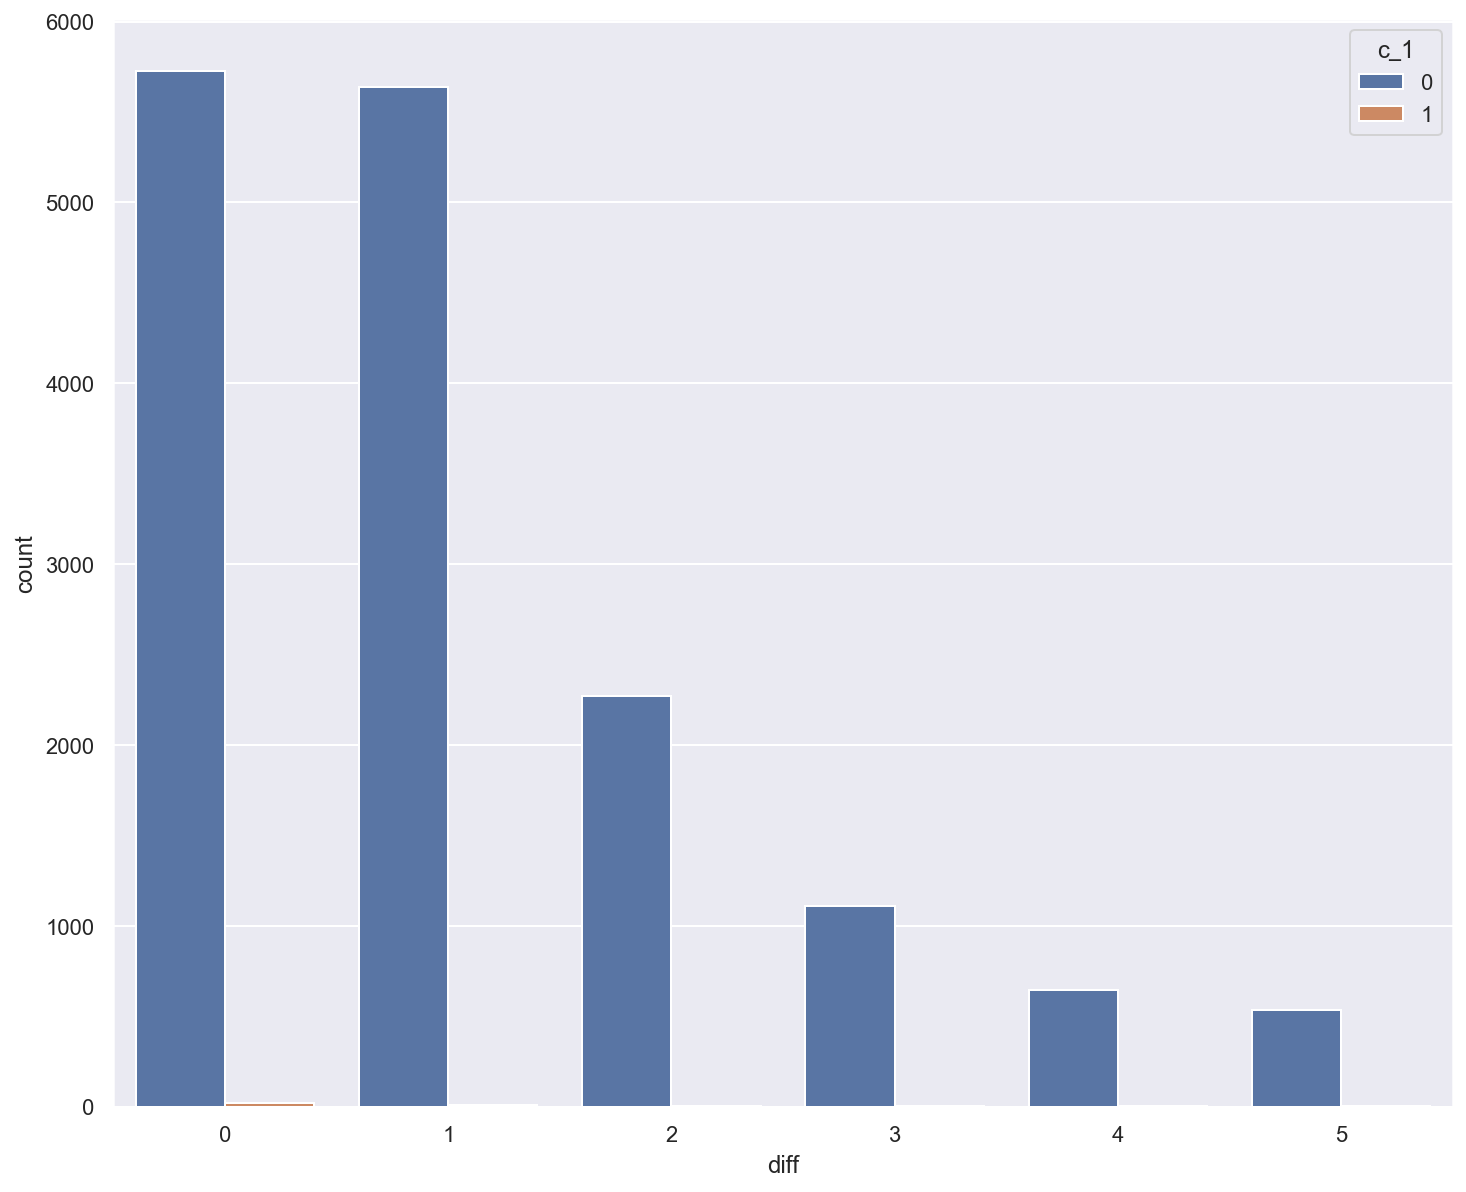

In [66]:
plt.figure(figsize=(12,10))
sns.countplot(x='diff', hue='c_1', data=df_tmp_diff);
